In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

Clean du lieu

In [ ]:
# Link share google drive của dữ liệu
link='https://drive.google.com/file/d/1D3ns9kqrpDj1YYnVb2Xs_-Vy8ol-ePKu/view?usp=sharing'
#Đọc data
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]

data = pd.read_csv(path)

# Hiển thị thông tin tổng quan về dữ liệu
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
print(data.describe())

               Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                1.000000      1.000

In [ ]:
# Knowing Number of Rows And Columns
data.shape
print(f"The Number Of Rows : {data.shape[0]}")
print(f"The Number Of Columns is : {data.shape[1]}")

The Number Of Rows : 1000
The Number Of Columns is : 25


In [ ]:
#Kiểm tra dữ liệu trùng
data.duplicated().sum()

0

In [ ]:

data = data.drop('Patient Id',axis=1)
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
#Kiểm tra dữ liệu null
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [ ]:
data['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [ ]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


Data visulization

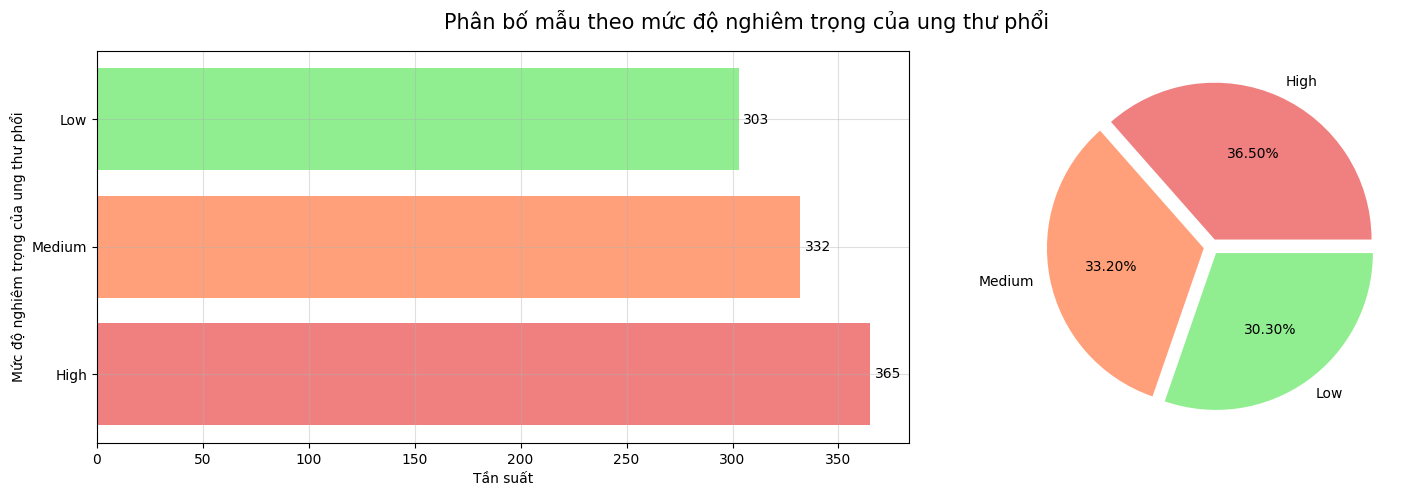

In [ ]:
targets = data['Level'].value_counts()
colors = ['lightcoral', 'lightsalmon', 'lightgreen']

# Tạo subplot với 2 cột
figure, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1.5, 1]})

# Biểu đồ cột ngang
axes[0].barh(y=targets.index, width=targets.values, color=colors)
axes[0].set_xlabel('Tần suất')
axes[0].set_ylabel('Mức độ nghiêm trọng của ung thư phổi')
axes[0].grid(alpha=0.4)

# Thêm nhãn cho mỗi cột
for index, values in enumerate(targets):
    axes[0].text(values + 2, index, str(values), va='center')

# Biểu đồ tròn
axes[1].pie(targets.values, labels=targets.index, autopct='%.2f%%', explode=([0.05] * len(targets.index)), colors=colors)

# Tiêu đề cho biểu đồ
figure.suptitle('Phân bố mẫu theo mức độ nghiêm trọng của ung thư phổi', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

Có sự khác biệt có ý nghĩa thống kê về tuổi tác giữa các bệnh nhân ung thư với mức độ nghiêm trọng khác nhau không?

<ipython-input-19-ea1b27b5c4a0>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], color='blue')


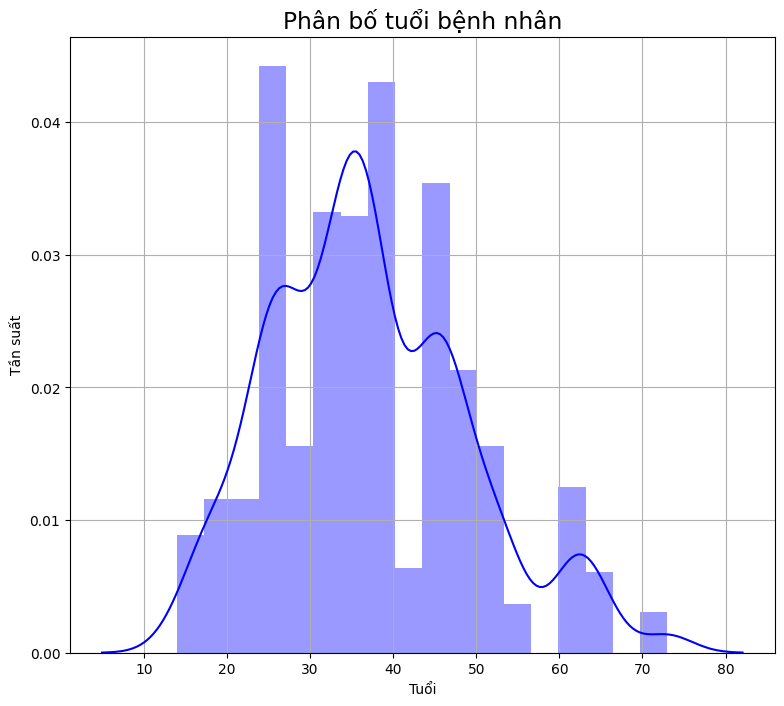

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.rc('font', size=14)
plt.rc('font', family='sans-serif')

plt.title('Phân bố tuổi bệnh nhân')
sns.distplot(data['Age'], color='blue')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

<ipython-input-20-20dfa41a55f3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_male['Age'], color='blue')


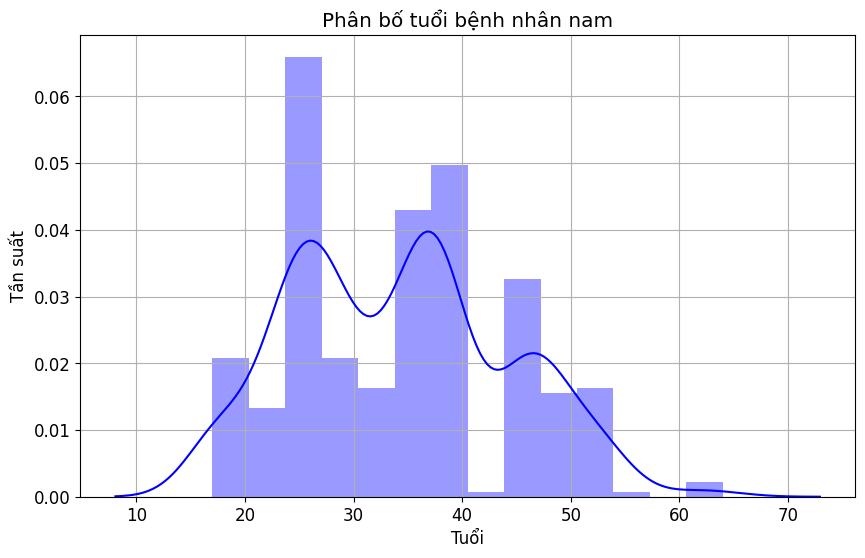

In [ ]:

# Lọc dữ liệu bệnh nhân nam
data_male = data[data['Gender'] == 2]

# Vẽ biểu đồ phân bố
plt.figure(figsize=(10, 6))
plt.rc('font', size=12)
plt.rc('font', family='sans-serif')

plt.title('Phân bố tuổi bệnh nhân nam')
sns.distplot(data_male['Age'], color='blue')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()


Phân bố giới tính của bệnh nhân như thế nào?

<ipython-input-21-f14ee4d314eb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender',palette=colors)
<ipython-input-21-f14ee4d314eb>:7: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=data, x='Gender',palette=colors)
<ipython-input-21-f14ee4d314eb>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Nữ', 'Nam'], ha='center')


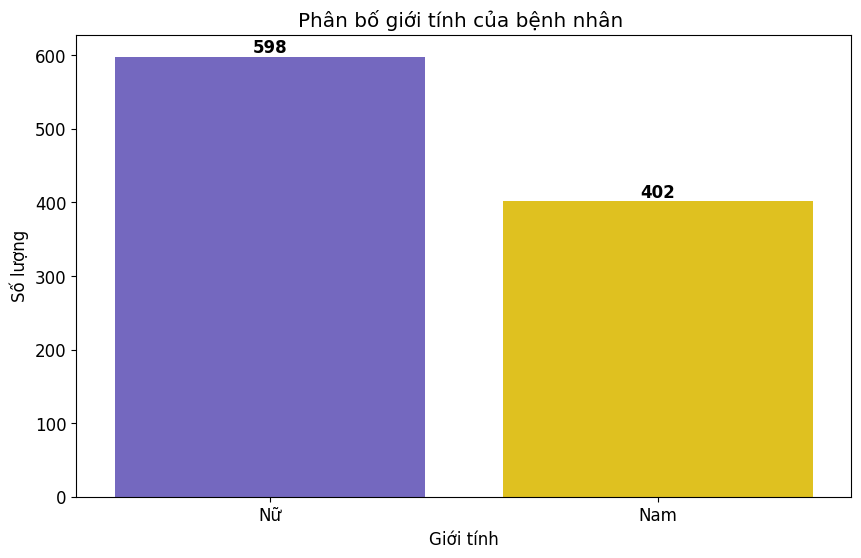

In [ ]:
colors = ['slateblue', 'gold', 'mediumaquamarine']

# Tạo figure và axis
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ countplot, phân loại theo 'Level'
sns.countplot(data=data, x='Gender',palette=colors)
ax.set_title('Phân bố giới tính của bệnh nhân ')
ax.set_xlabel('Giới tính')
ax.set_ylabel('Số lượng')

# Căn giữa các nhãn trục x
ax.set_xticklabels(['Nữ', 'Nam'], ha='center')

# Thêm số lượng ở trên đầu các cột
for i, v in enumerate(data['Gender'].value_counts()):
    ax.text(i, v, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()

# Mô tả dữ liệu

In [ ]:
# create function to visualized categorical column using count plot

def count_plot(column_name , hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    plt.rc('font', size=14)
    graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()

## Môi trường và lối sống

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


<Figure size 2000x2500 with 0 Axes>

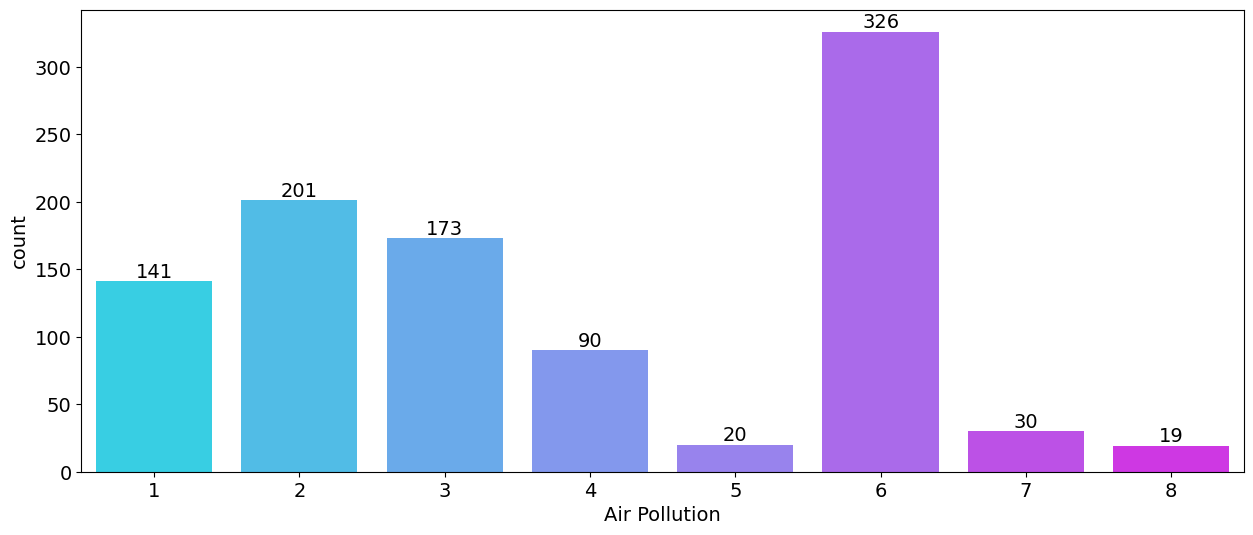

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


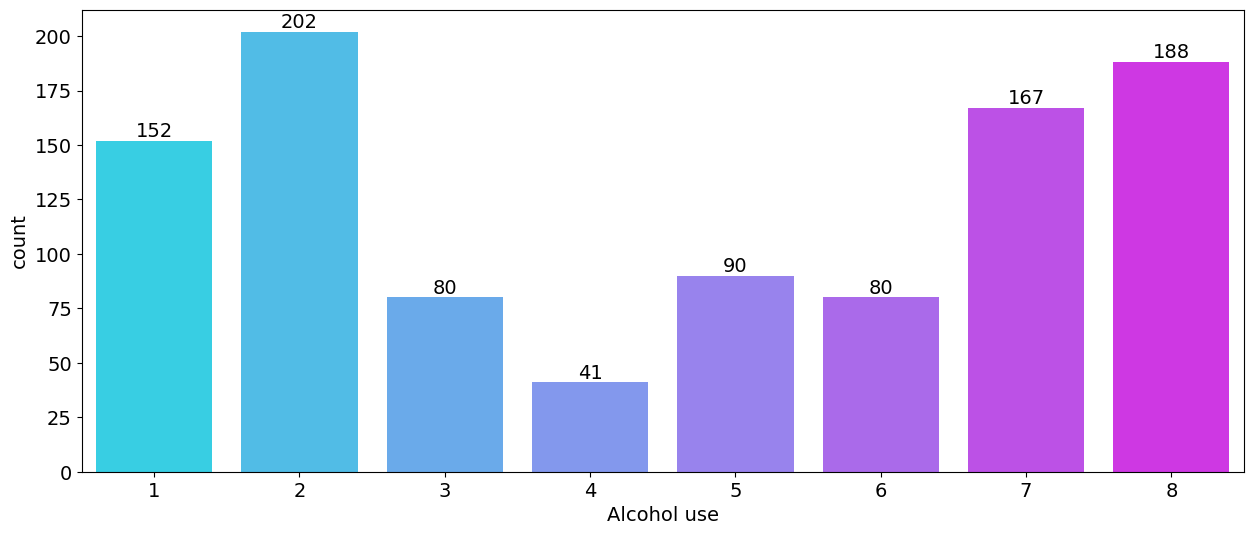

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


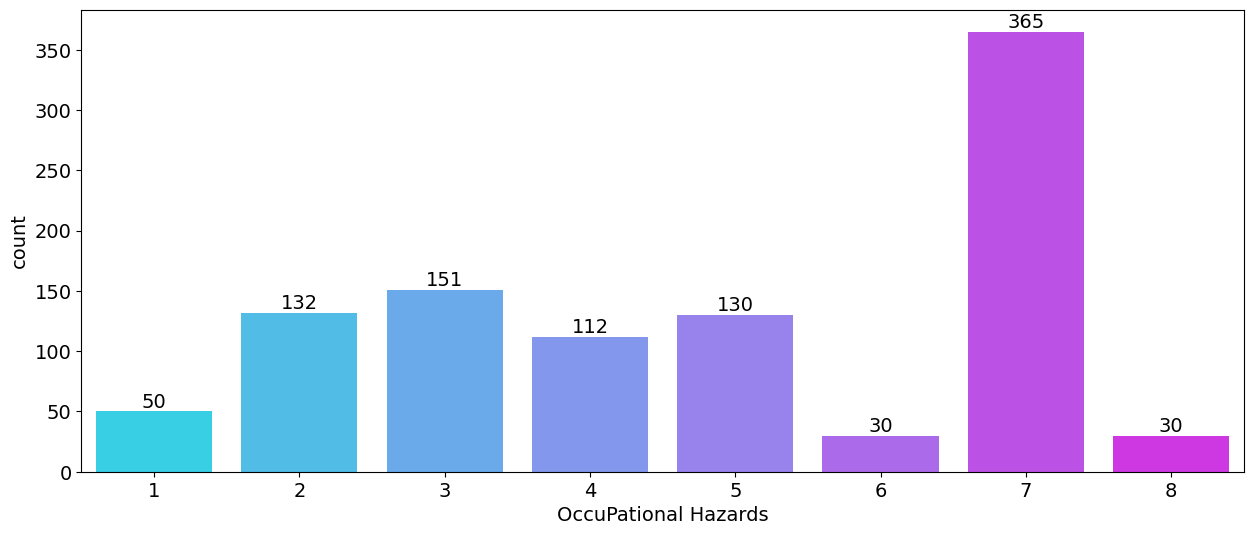

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


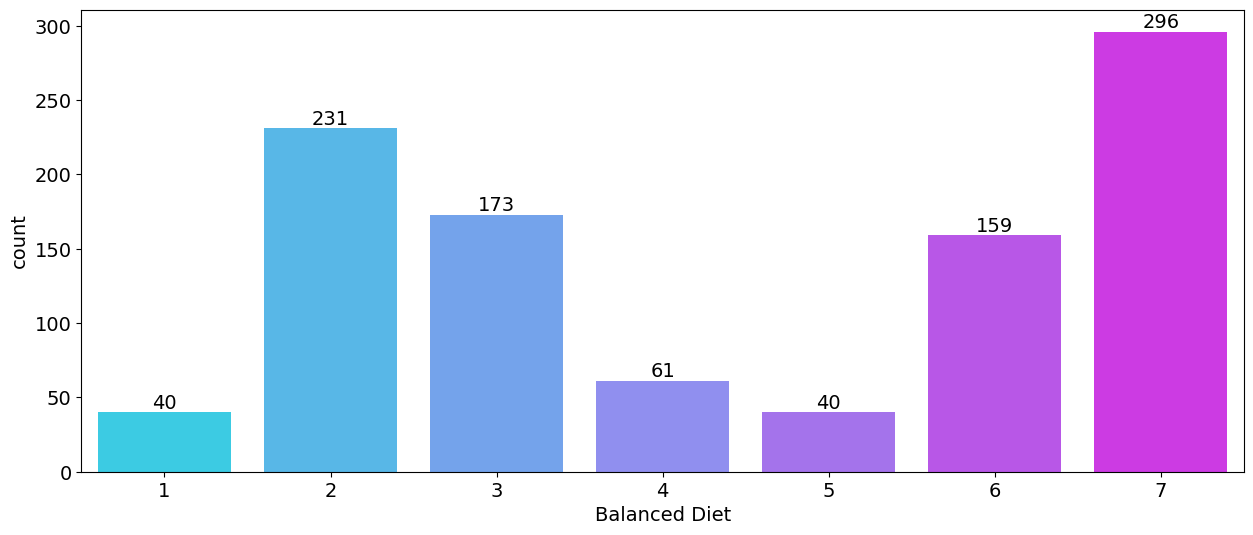

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


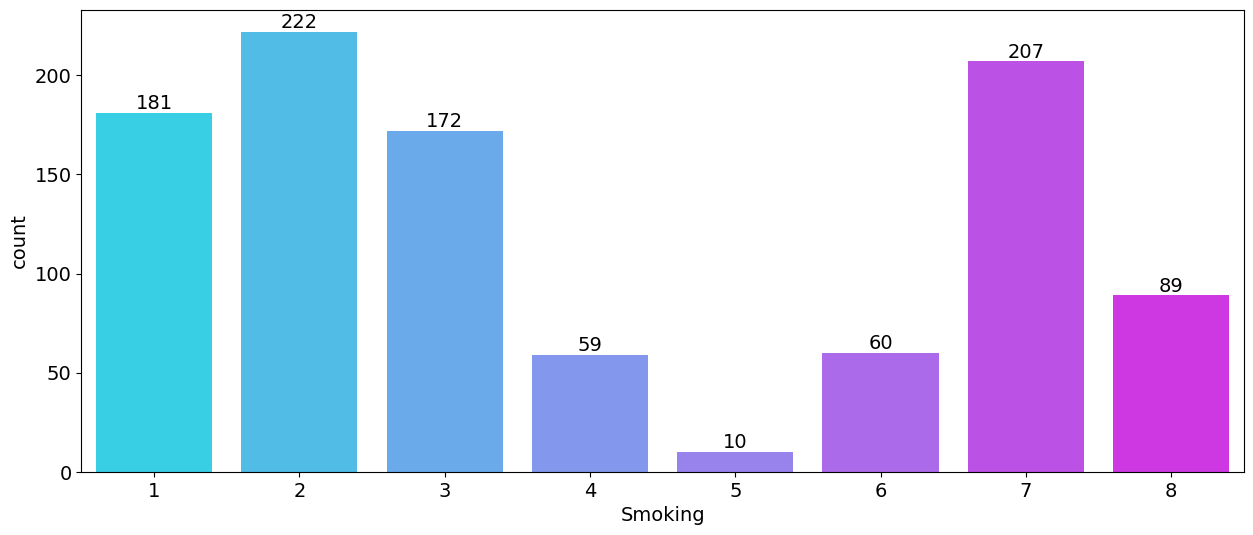

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


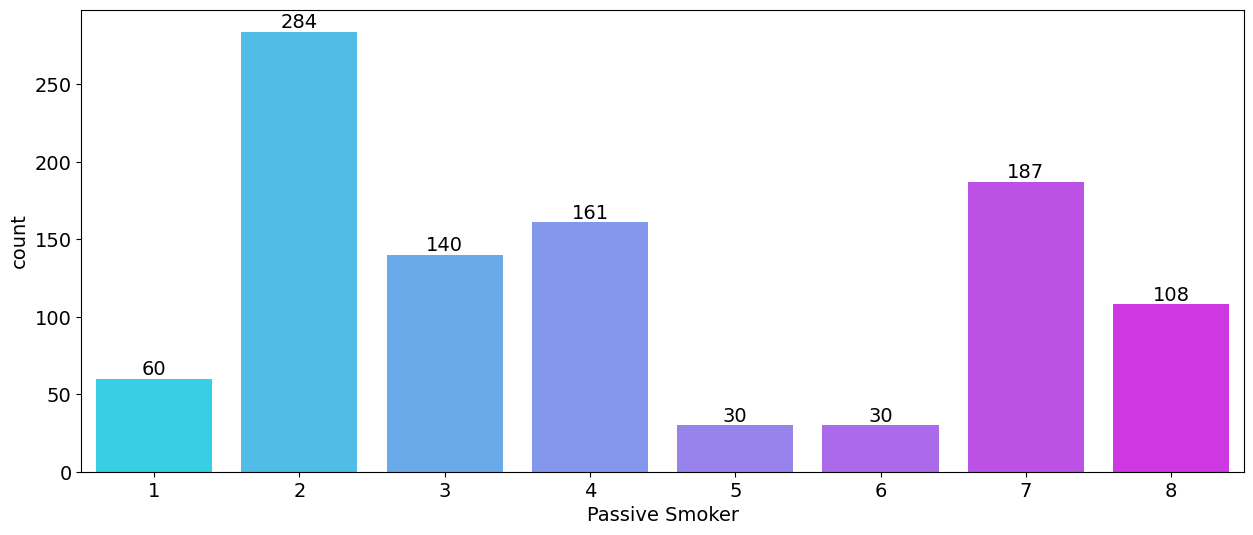

In [ ]:
columns = ['Air Pollution','Alcohol use','OccuPational Hazards','Balanced Diet','Smoking','Passive Smoker']

k=0
plt.figure(figsize=(20,25))
for col in columns:
    # first set figure size
    plt.figure(figsize = (15,6))
    # call function i create it in cell 11
    count_plot(column_name = col)

## Tác nhân bên trong

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


<Figure size 2000x2500 with 0 Axes>

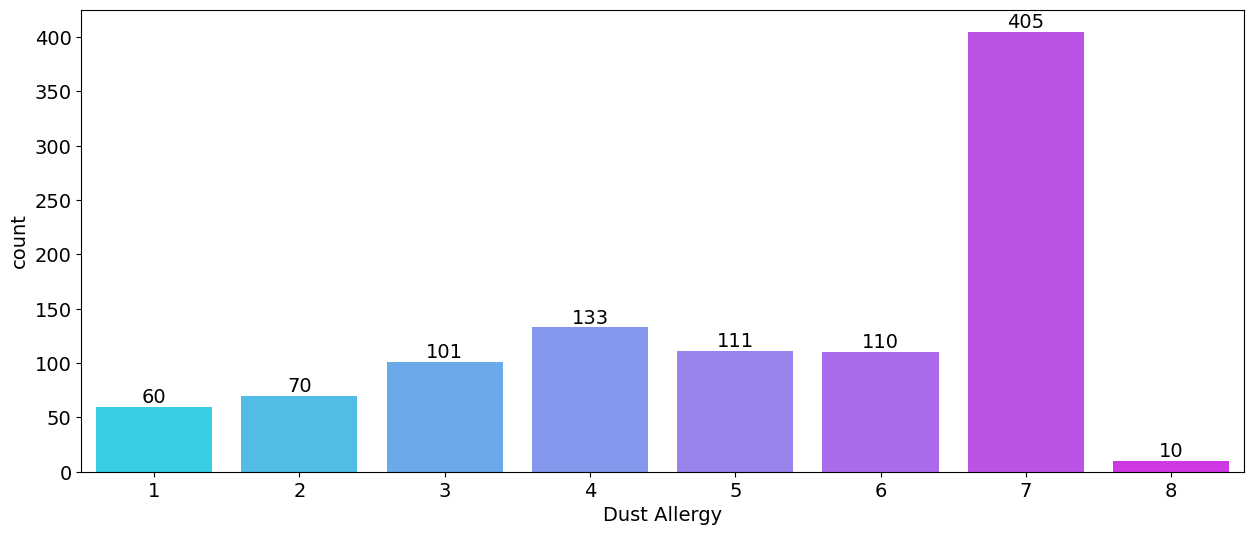

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


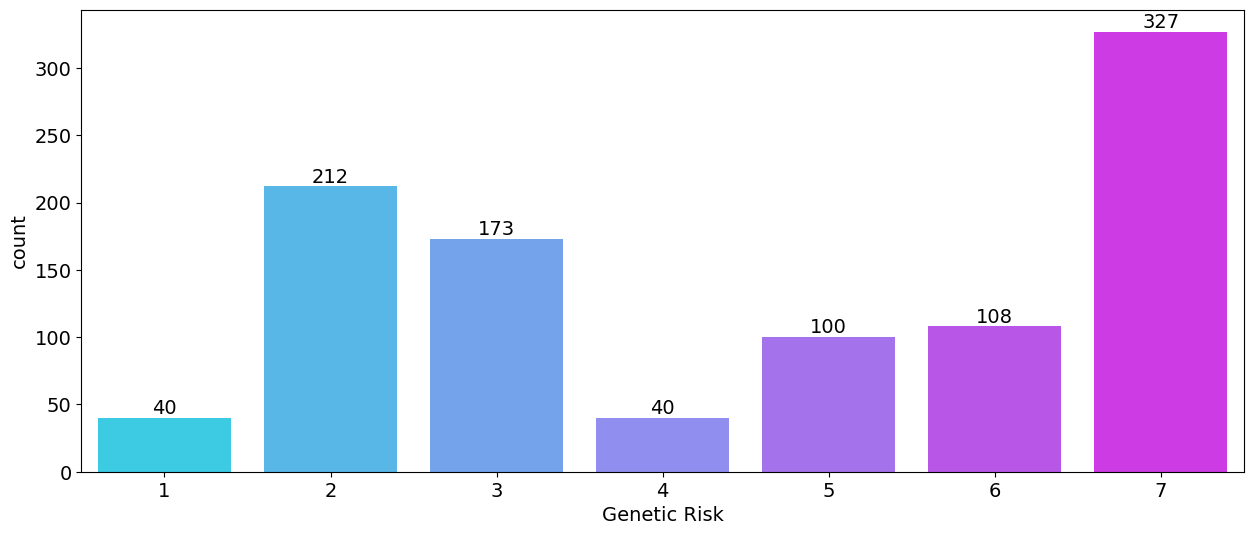

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


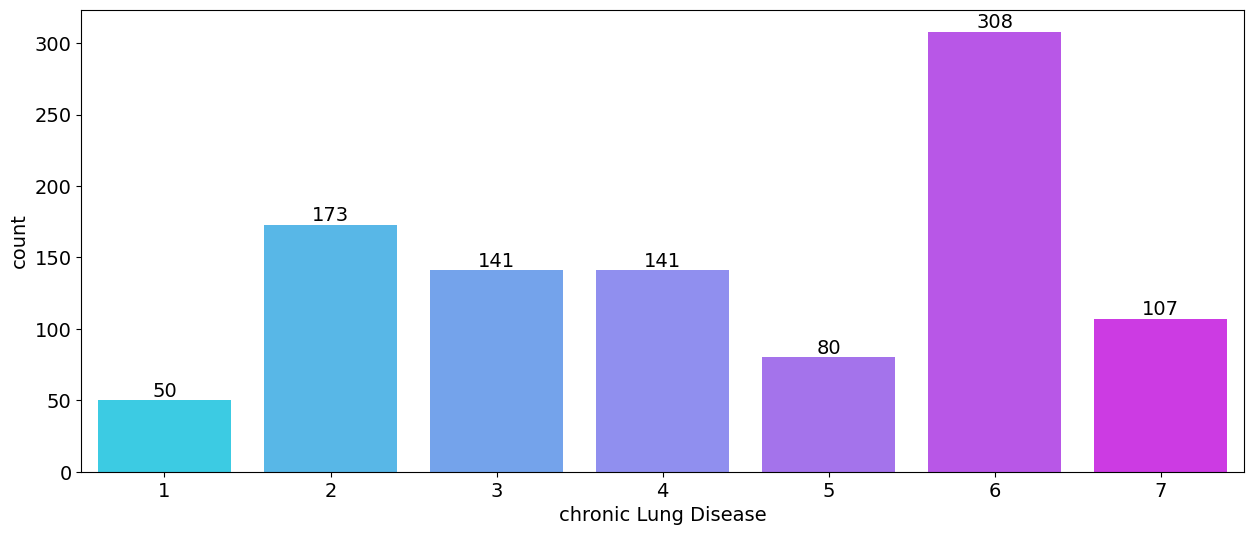

<ipython-input-22-f5b2d6d20bc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = column_name, data = data, hue = hue, palette="cool")


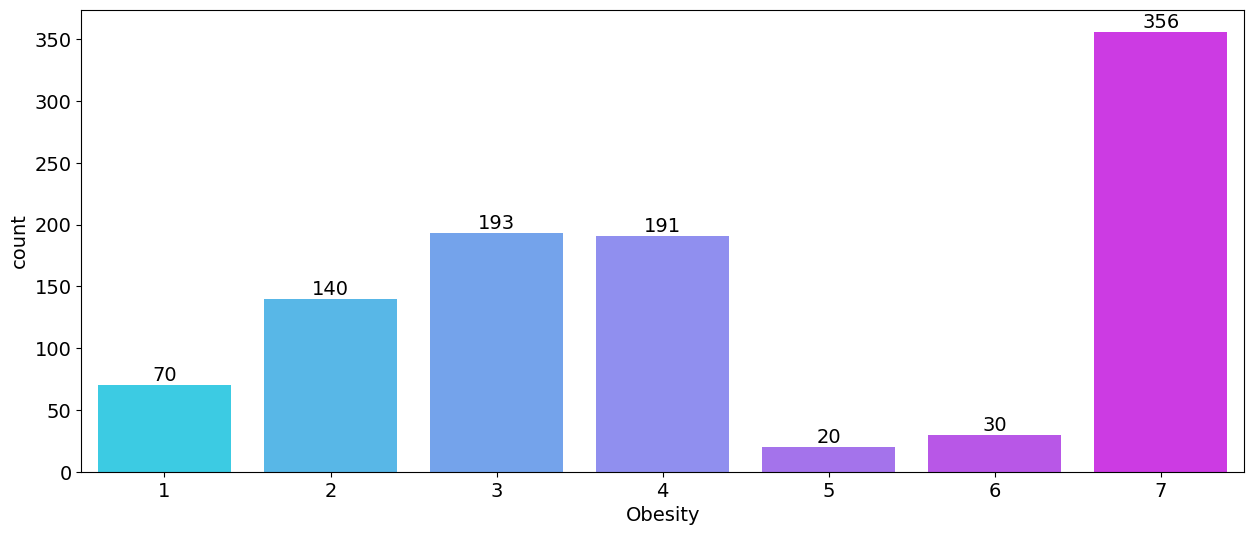

In [ ]:

columns = ['Dust Allergy','Genetic Risk', 'chronic Lung Disease','Obesity']

k=0
plt.figure(figsize=(20,25))
for col in columns:
    # first set figure size
    plt.figure(figsize = (15,6))
    # call function i create it in cell 11
    count_plot(column_name = col)

## Triệu chứng hô hấp

In [1]:
# Listing categorical columns for checking data imbalance and plotting them
col_category = ['Chest Pain','Coughing of Blood','Fatigue','Weight Loss','Shortness of Breath','Wheezing','Swallowing Difficulty','Clubbing of Finger Nails']
plt.rc('font', size=14)
k=0
plt.figure(figsize=(20,25))
for col in col_category:
    k=k+1
    plt.subplot(4, 3,k)
    sns.countplot(x=col, data=data)  # Use countplot from seaborn

plt.tight_layout()  # Adjust spacing to avoid overlapping elements
plt.show()

NameError: name 'plt' is not defined

# Phân tích

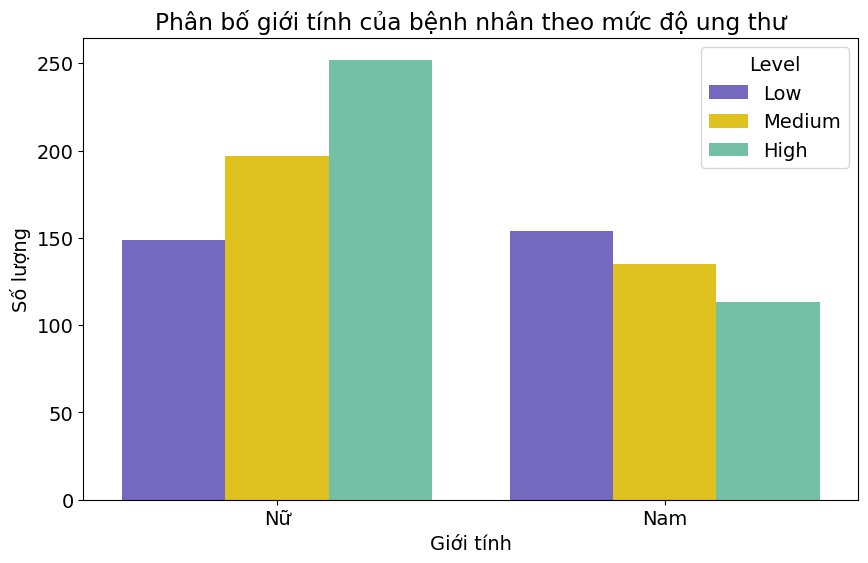

In [ ]:
colors = ['slateblue', 'gold', 'mediumaquamarine']

# 2. Phân bố giới tính theo mức độ ung thư với các thanh gần nhau hơn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Level', palette=colors, dodge=True)
plt.title('Phân bố giới tính của bệnh nhân theo mức độ ung thư')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.xticks([0, 1], ['Nữ', 'Nam'])
plt.show()

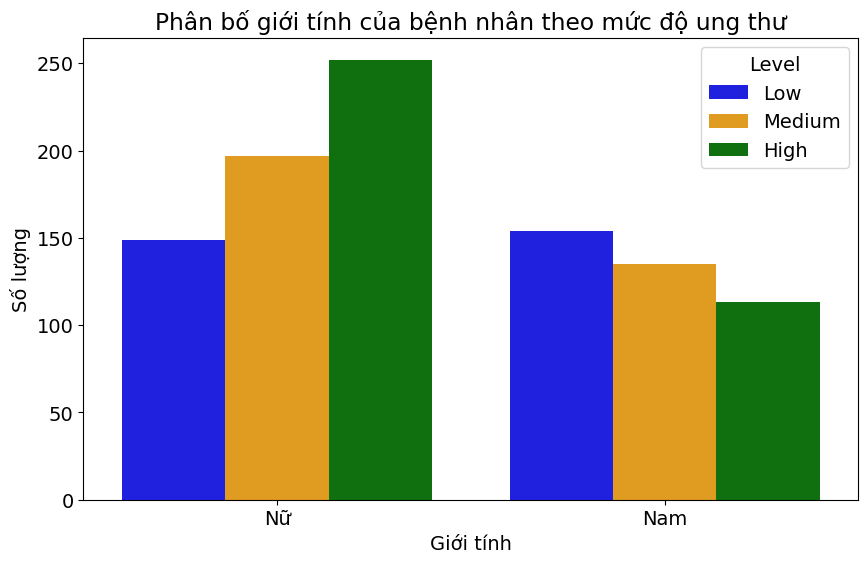

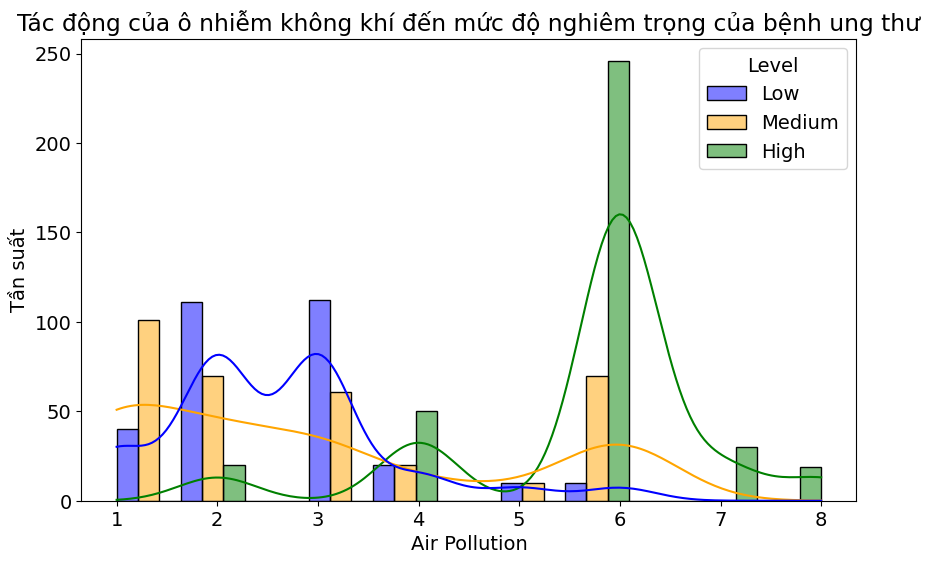

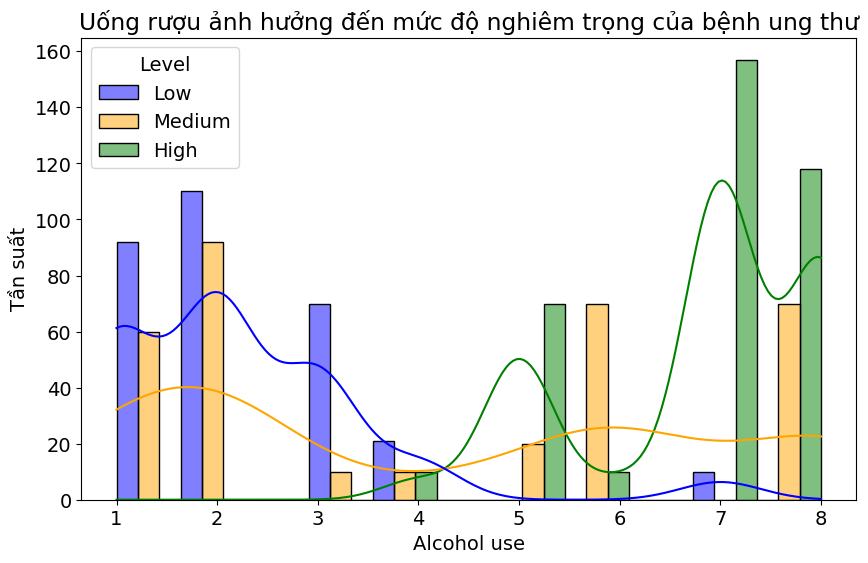

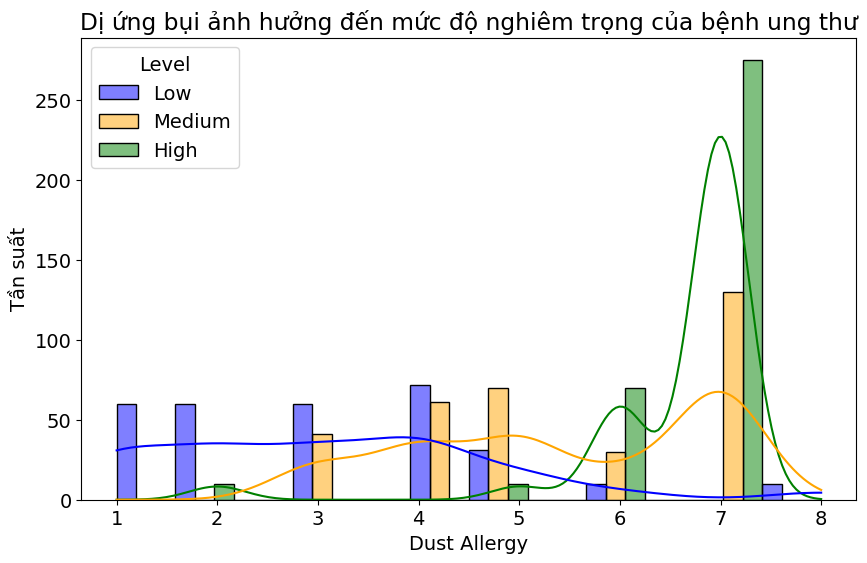

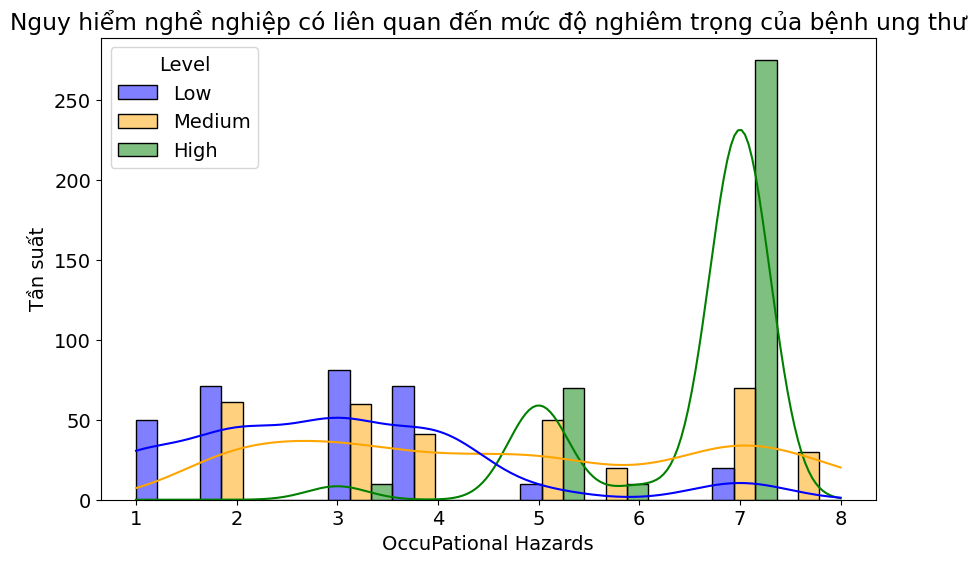

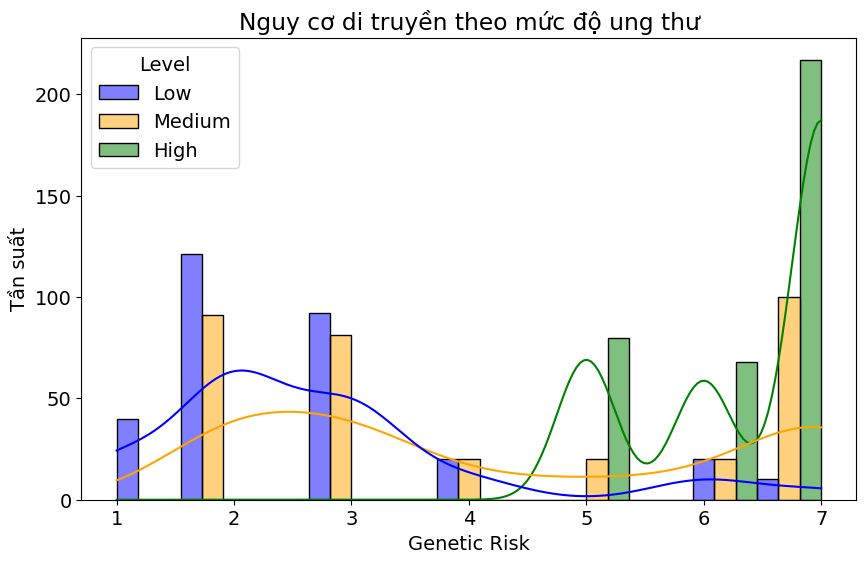

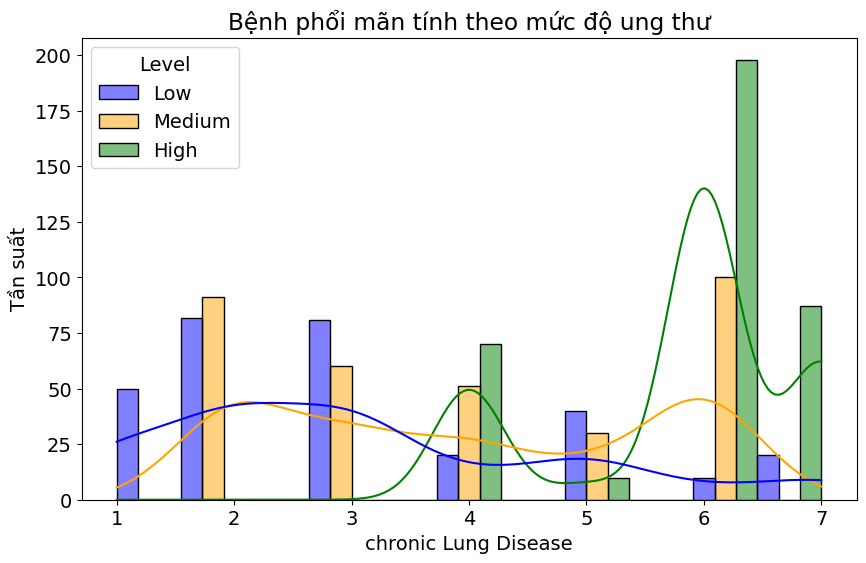

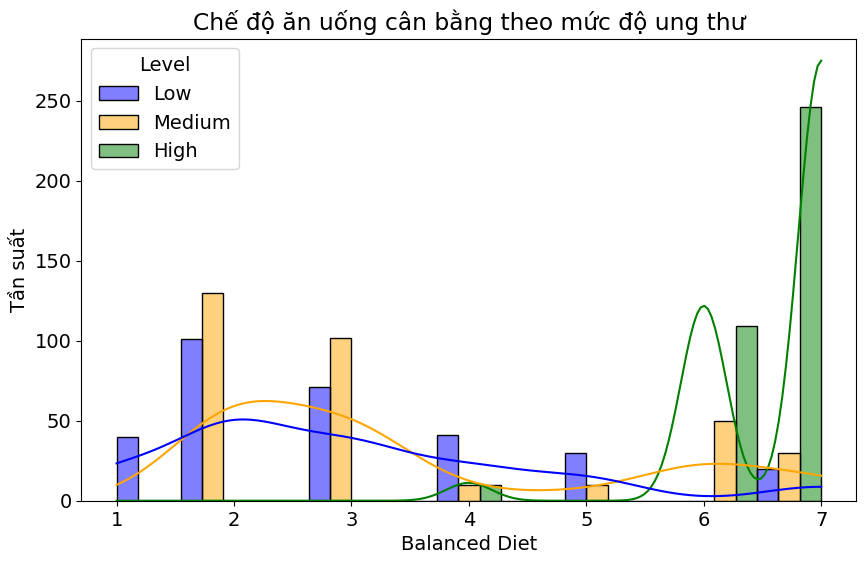

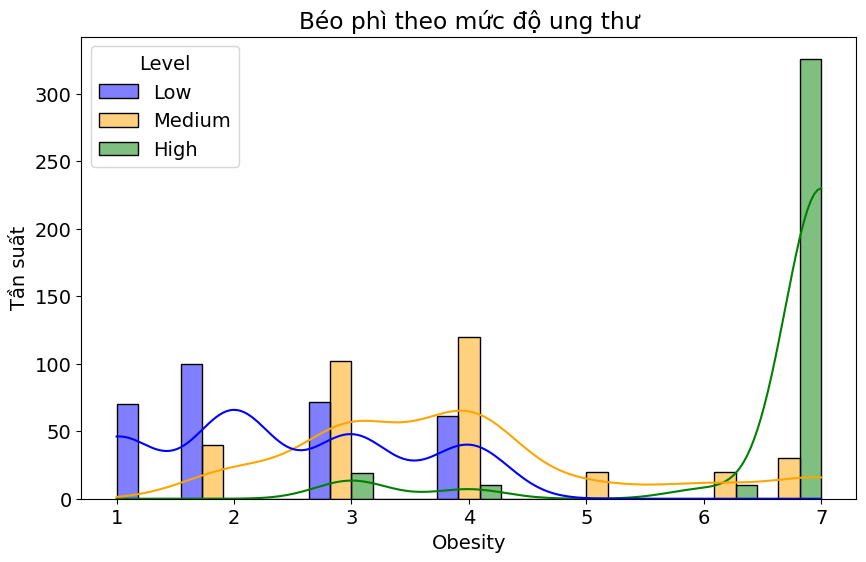

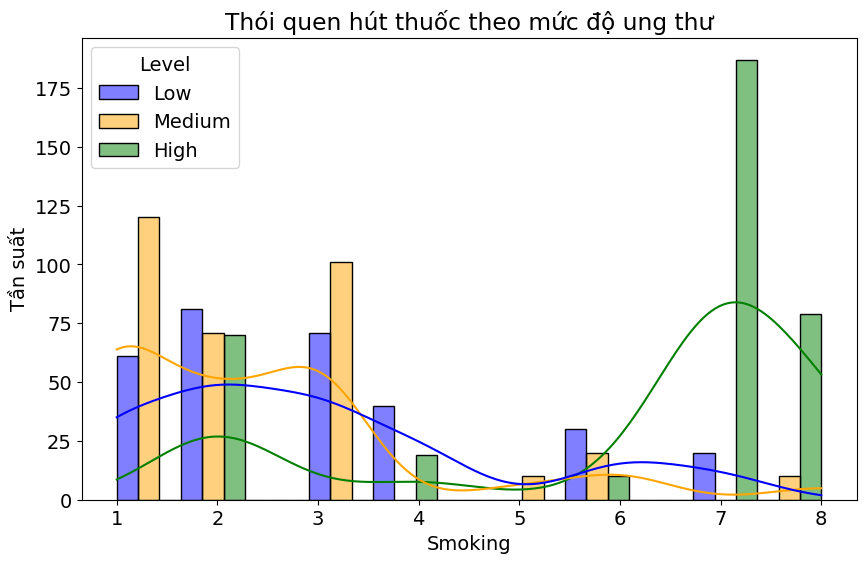

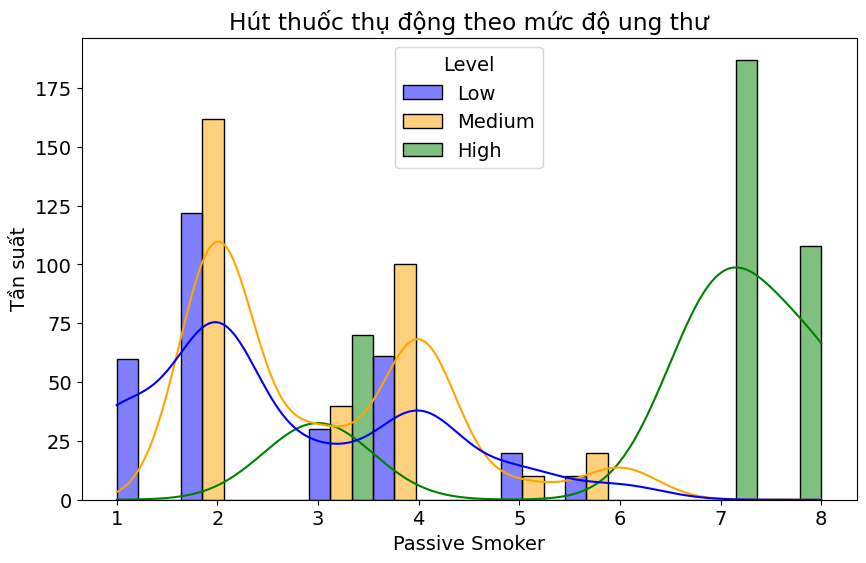

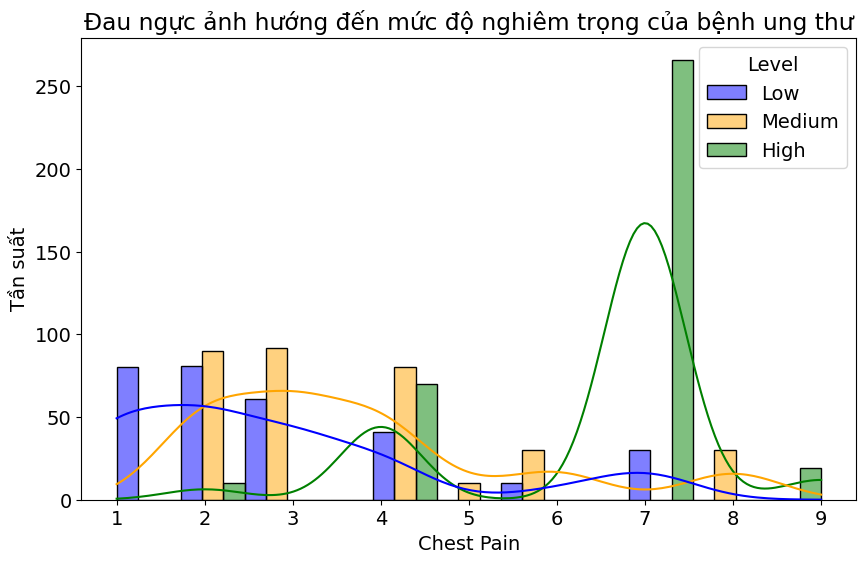

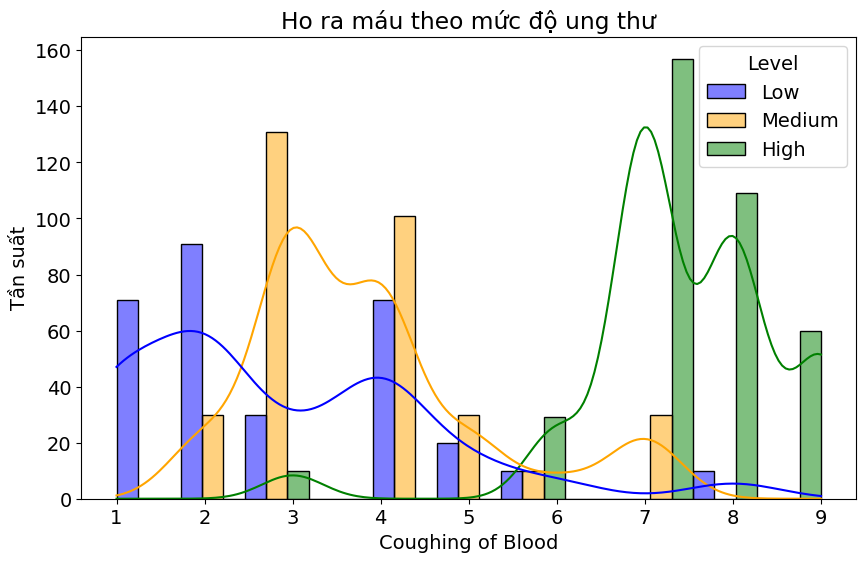

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Redefine colors for better clarity
colors = ['blue', 'orange', 'green']

# Function to create histplot with bars closer together
def create_histplot(feature, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='Level', kde=True, palette=colors, multiple='dodge')
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Tần suất')
    plt.show()

# 2. Phân bố giới tính theo mức độ ung thư với các thanh gần nhau hơn
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Level', palette=colors, dodge=True)
plt.title('Phân bố giới tính của bệnh nhân theo mức độ ung thư')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.xticks([0, 1], ['Nữ', 'Nam'])
plt.show()

# 3. Phân bố các đặc điểm khác theo mức độ ung thư với các thanh gần nhau hơn
features = [
    ('Air Pollution', 'Tác động của ô nhiễm không khí đến mức độ nghiêm trọng của bệnh ung thư'),
    ('Alcohol use','Uống rượu ảnh hưởng đến mức độ nghiêm trọng của bệnh ung thư'),
    ('Dust Allergy', 'Dị ứng bụi ảnh hưởng đến mức độ nghiêm trọng của bệnh ung thư'),
    ('OccuPational Hazards','Nguy hiểm nghề nghiệp có liên quan đến mức độ nghiêm trọng của bệnh ung thư'),
    ('Genetic Risk', 'Nguy cơ di truyền theo mức độ ung thư'),
    ('chronic Lung Disease', 'Bệnh phổi mãn tính theo mức độ ung thư'),
    ('Balanced Diet', 'Chế độ ăn uống cân bằng theo mức độ ung thư'),
    ('Obesity', 'Béo phì theo mức độ ung thư'),
    ('Smoking', 'Thói quen hút thuốc theo mức độ ung thư'),
    ('Passive Smoker', 'Hút thuốc thụ động theo mức độ ung thư'),
    ('Chest Pain','Đau ngực ảnh hướng đến mức độ nghiêm trọng của bệnh ung thư'),
    ('Coughing of Blood', 'Ho ra máu theo mức độ ung thư')
]

for feature, title in features:
    create_histplot(feature, title)

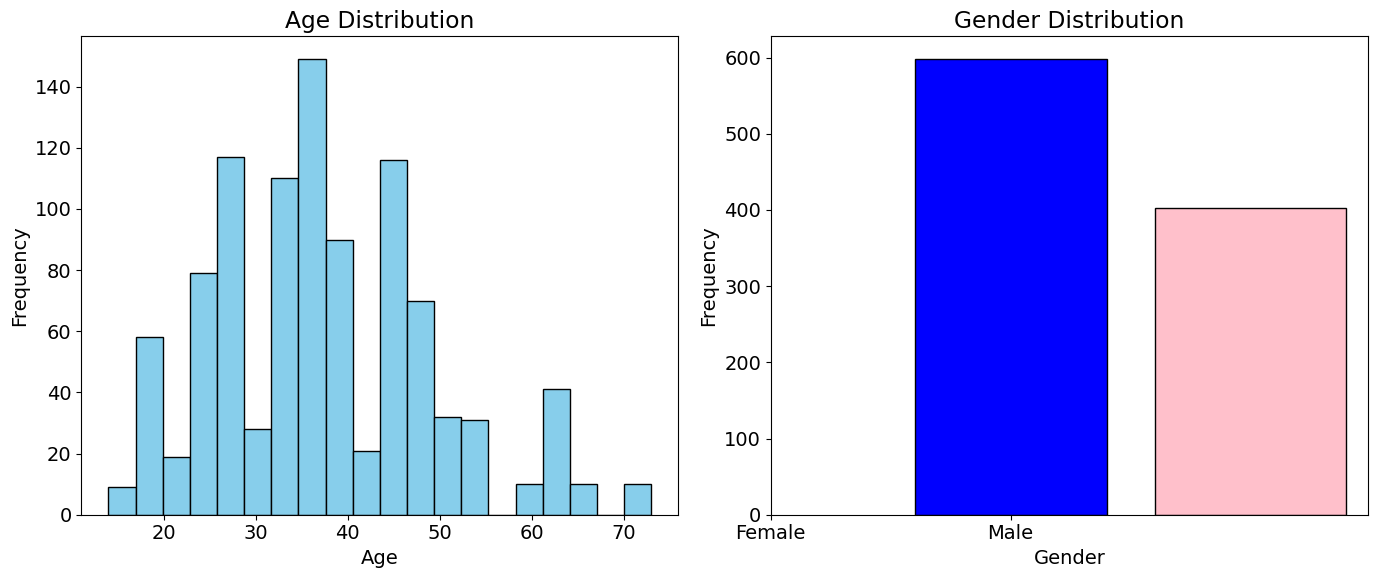

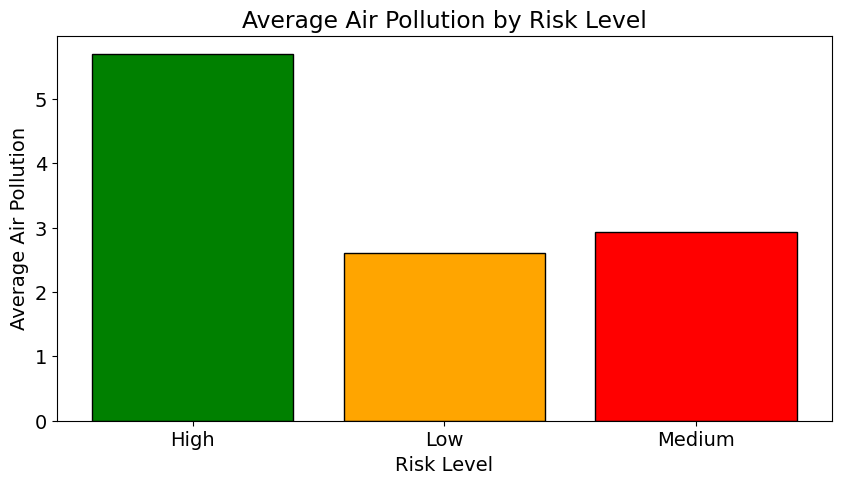

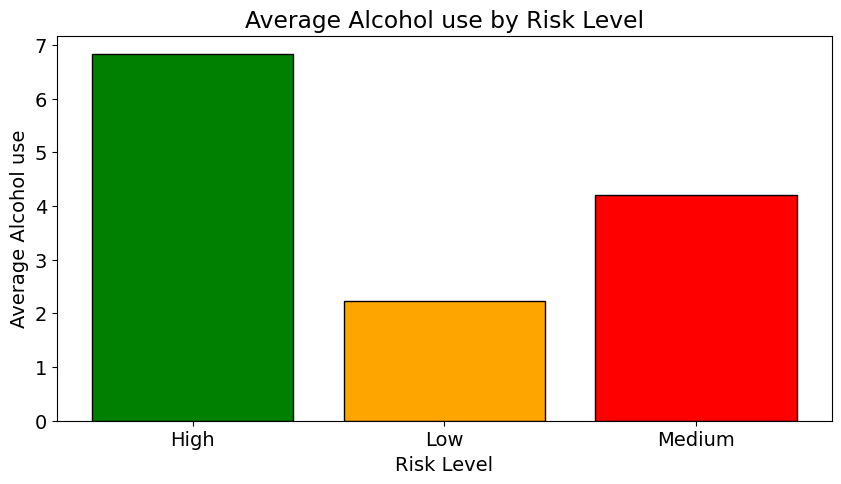

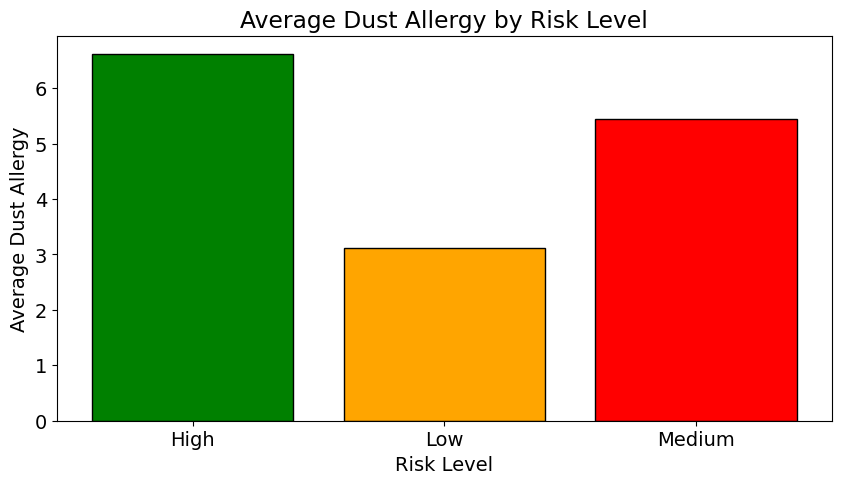

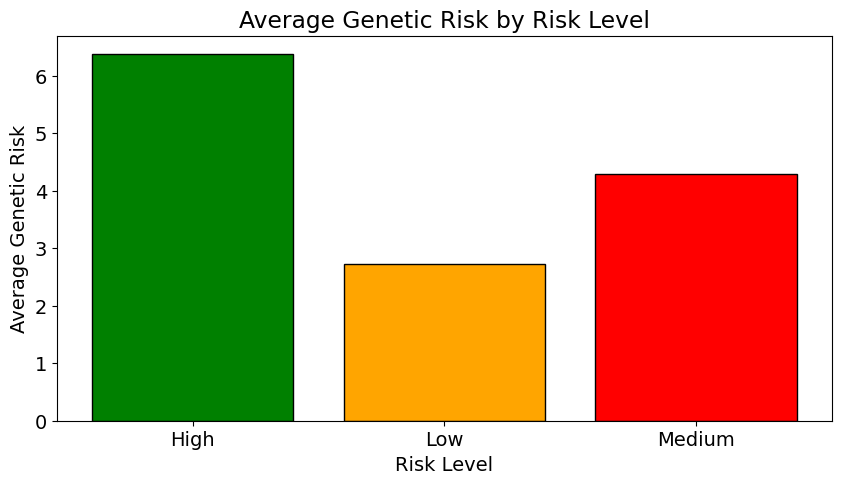

In [ ]:
# Visualizing the distribution of Age and Gender
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(data['Gender'].value_counts().index, data['Gender'].value_counts(), color=['blue', 'pink'], edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.tight_layout()
plt.show()

# Visualizing the relationship between some selected features and risk level
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk']
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    plt.bar(data.groupby('Level')[feature].mean().index, data.groupby('Level')[feature].mean(), color=['green', 'orange', 'red'], edgecolor='black')
    plt.title(f'Average {feature} by Risk Level')
    plt.xlabel('Risk Level')
    plt.ylabel(f'Average {feature}')
    plt.show()


In [ ]:
# Visualize correlations
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Cancer Patient Data')
plt.show()


ValueError: could not convert string to float: 'Low'

<Figure size 1400x1000 with 0 Axes>

Strong Positive Correlations:

There is a notable positive correlation between Genetic Risk and chronic Lung Disease.
Obesity and Smoking show a positive correlation.
Passive Smoker and Smoking also have a positive correlation.


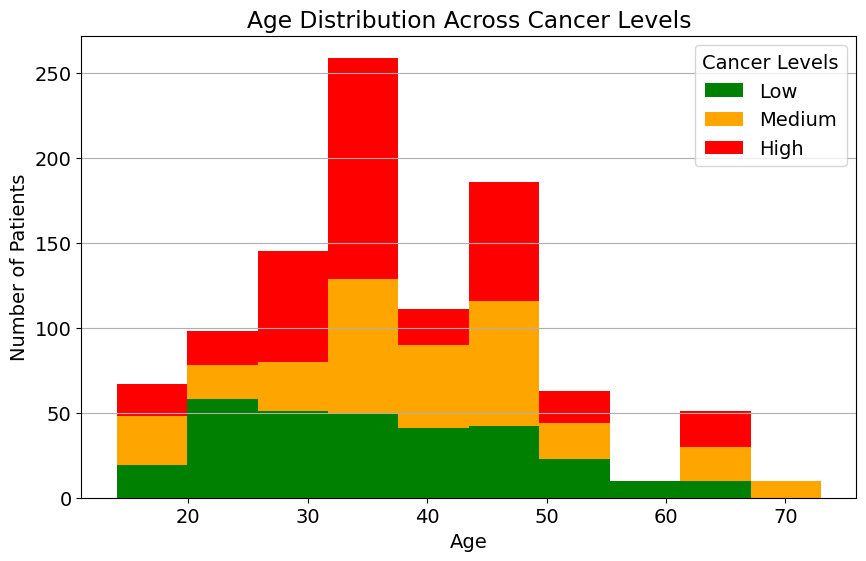

In [ ]:

# Define distinct colors for each level again
colors = {
    'Low': 'green',
    'Medium': 'orange',
    'High': 'red'
}

# Plotting
plt.figure(figsize=(10, 6))

# Create stacked histogram
plt.hist(
    [data[data['Level'] == level]['Age'] for level in data['Level'].unique()],
    bins=10,
    stacked=True,
    color=[colors.get(level, 'grey') for level in data['Level'].unique()],
    label=data['Level'].unique()
)

plt.title('Age Distribution Across Cancer Levels')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Cancer Levels')
plt.grid(axis='y')
plt.show()


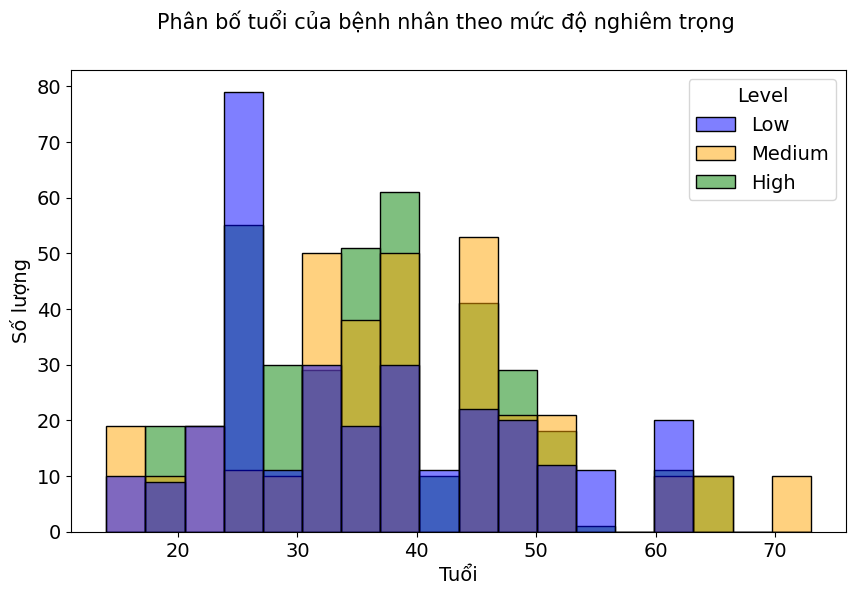

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Redefine colors for better clarity
colors = ['blue', 'orange', 'green']

# Tạo subplot với 1 hàng và 1 cột (chỉ có 1 biểu đồ)
figure, axes = plt.subplots(1, 1, figsize=(10, 6))  # Thay đổi kích thước nếu cần

# Tạo biểu đồ histplot cho tuổi tác
sns.histplot(data=data, x=data['Age'], hue=data['Level'], ax=axes, palette=colors)

# Đặt tiêu đề cho biểu đồ
figure.suptitle('Phân bố tuổi của bệnh nhân theo mức độ nghiêm trọng', fontsize=15)
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()

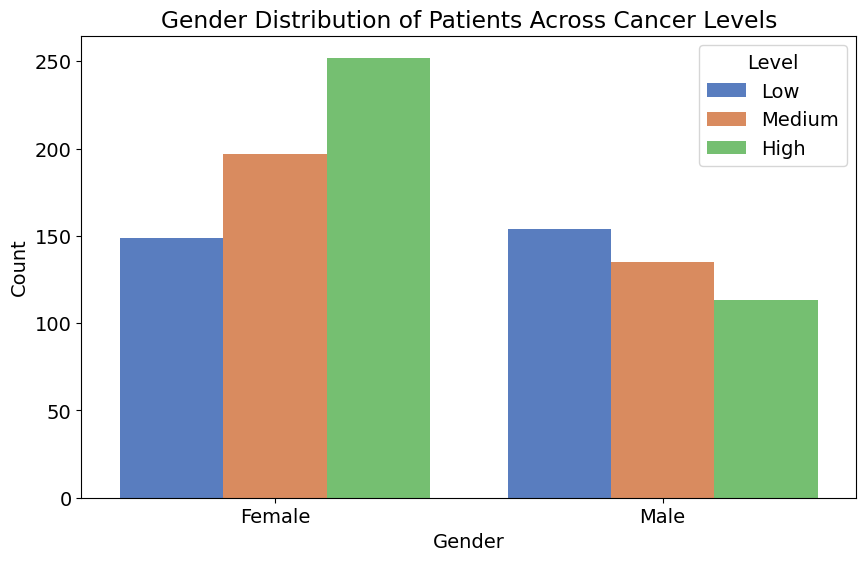

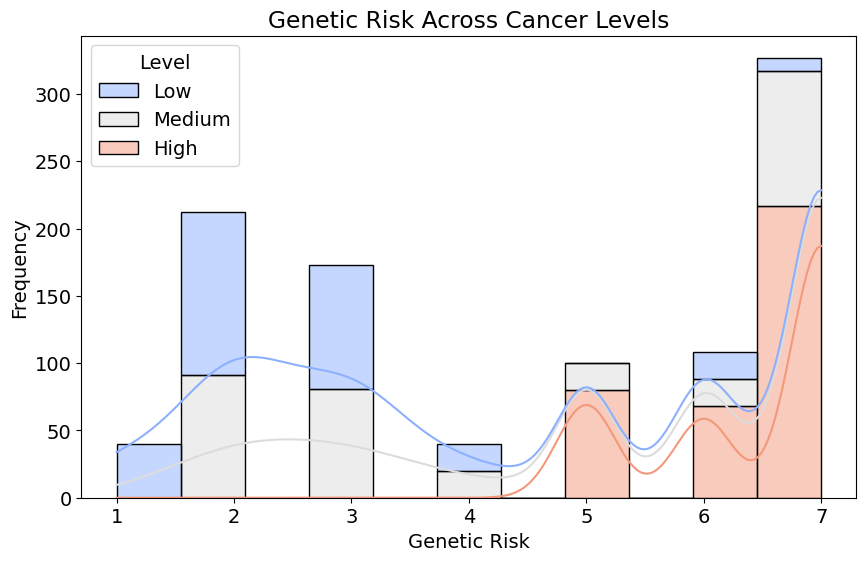

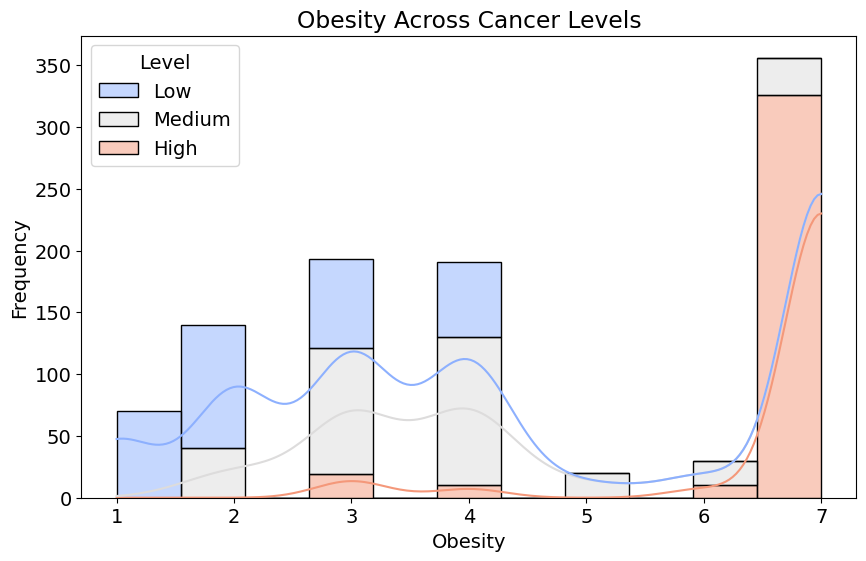

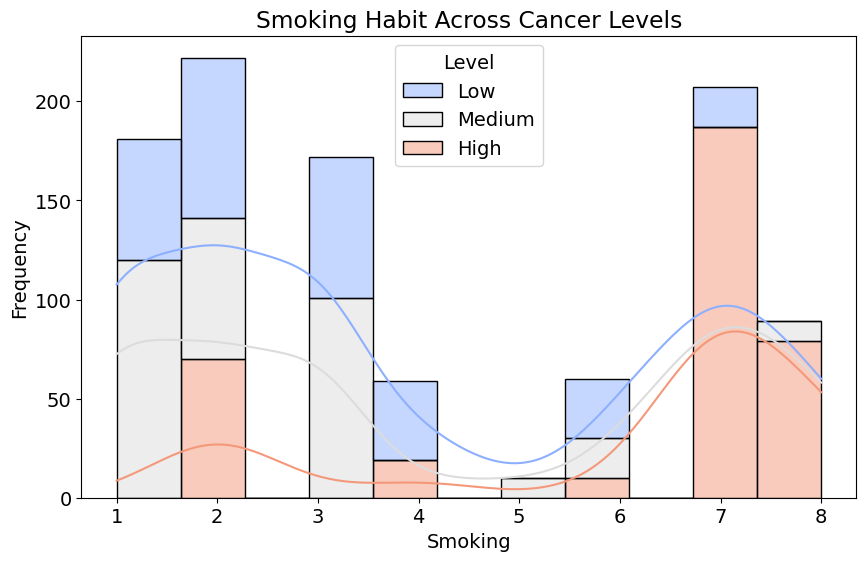

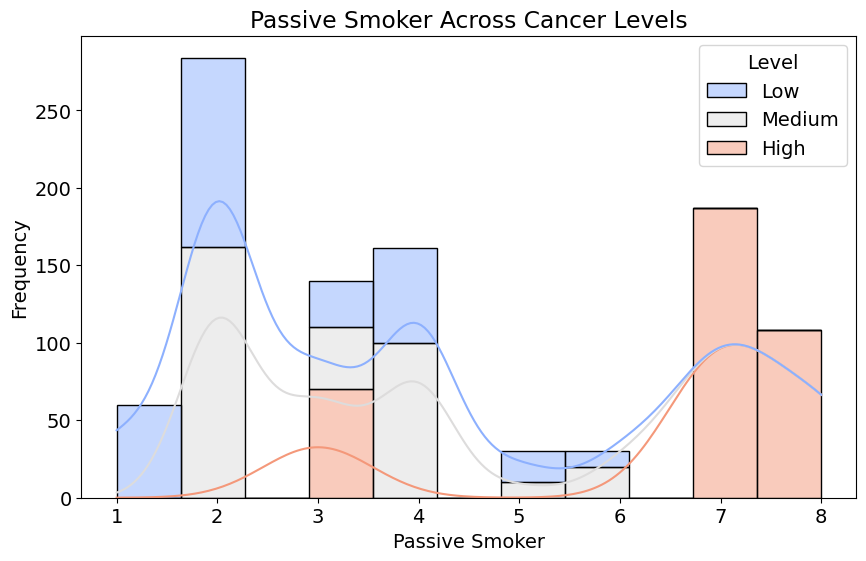

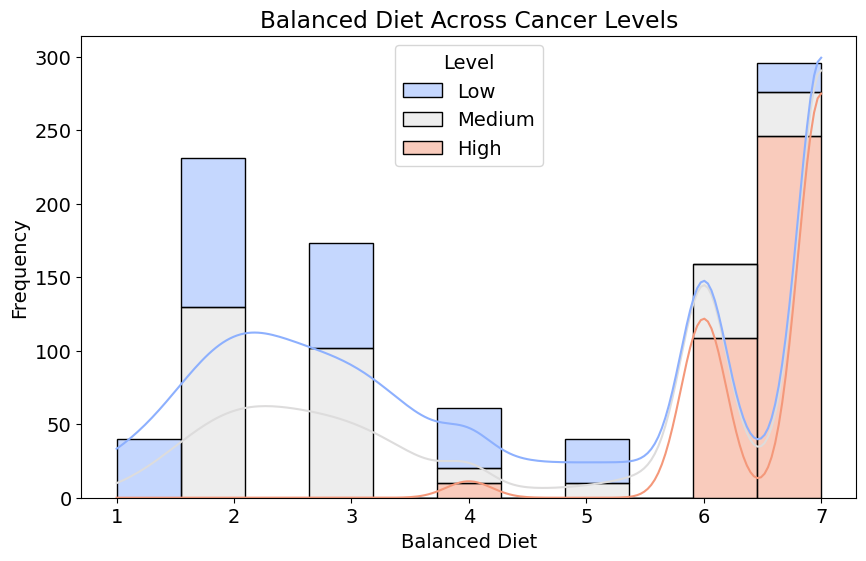

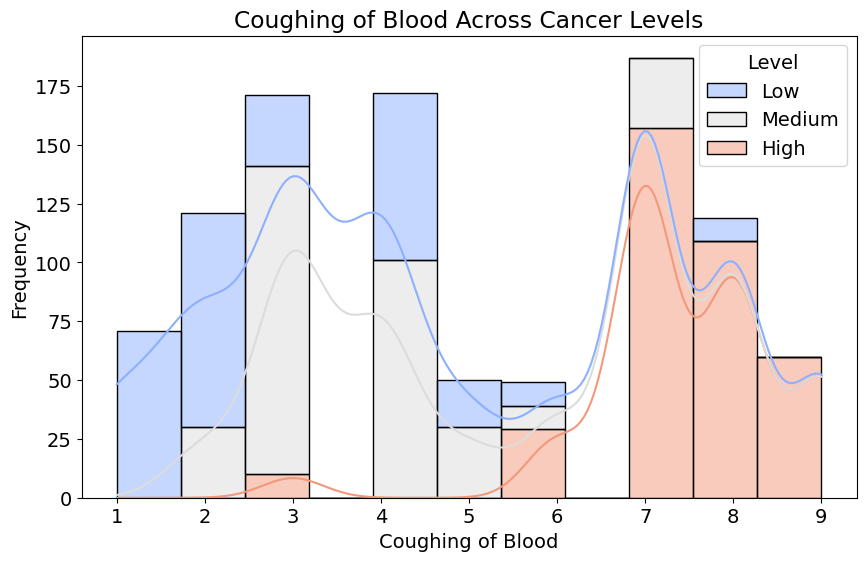

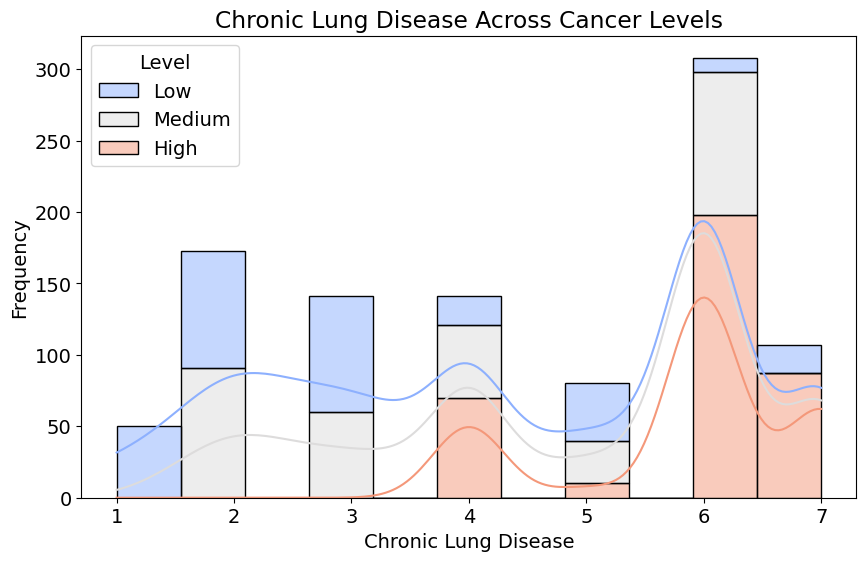

In [ ]:


# 2. Gender Distribution Across Cancer Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Level', palette='muted')
plt.title('Gender Distribution of Patients Across Cancer Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# 3. Other feature distributions across Cancer Levels
# Genetic Risk
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Genetic Risk', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Genetic Risk Across Cancer Levels')
plt.xlabel('Genetic Risk')
plt.ylabel('Frequency')
plt.show()

# Obesity
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Obesity', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Obesity Across Cancer Levels')
plt.xlabel('Obesity')
plt.ylabel('Frequency')
plt.show()

# Smoking
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Smoking', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Smoking Habit Across Cancer Levels')
plt.xlabel('Smoking')
plt.ylabel('Frequency')
plt.show()

# Passive Smoker
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Passive Smoker', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Passive Smoker Across Cancer Levels')
plt.xlabel('Passive Smoker')
plt.ylabel('Frequency')
plt.show()

# Balanced Diet
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Balanced Diet', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Balanced Diet Across Cancer Levels')
plt.xlabel('Balanced Diet')
plt.ylabel('Frequency')
plt.show()

# Coughing of Blood
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Coughing of Blood', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Coughing of Blood Across Cancer Levels')
plt.xlabel('Coughing of Blood')
plt.ylabel('Frequency')
plt.show()
# Plot for Chronic Lung Disease distribution across cancer levels
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='chronic Lung Disease', hue='Level', kde=True, palette='coolwarm', multiple='stack')
plt.title('Chronic Lung Disease Across Cancer Levels')
plt.xlabel('Chronic Lung Disease')
plt.ylabel('Frequency')
plt.show()


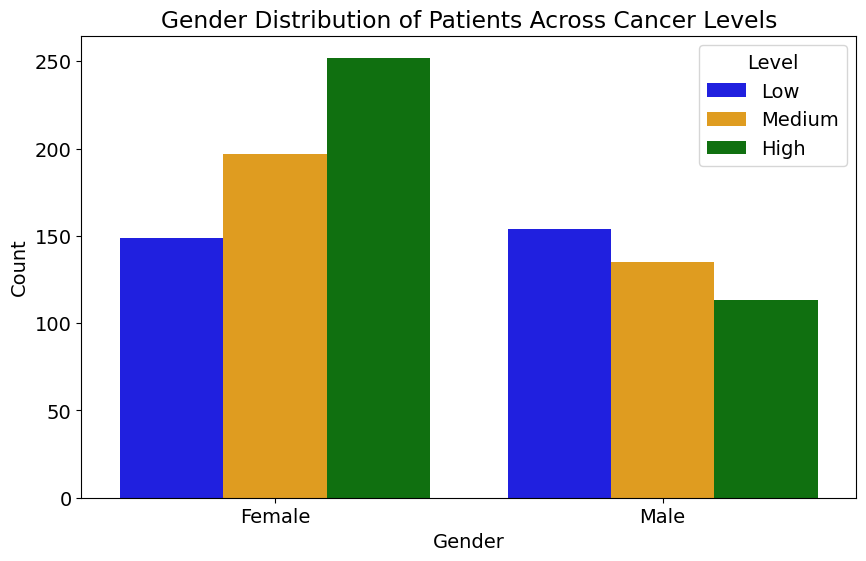

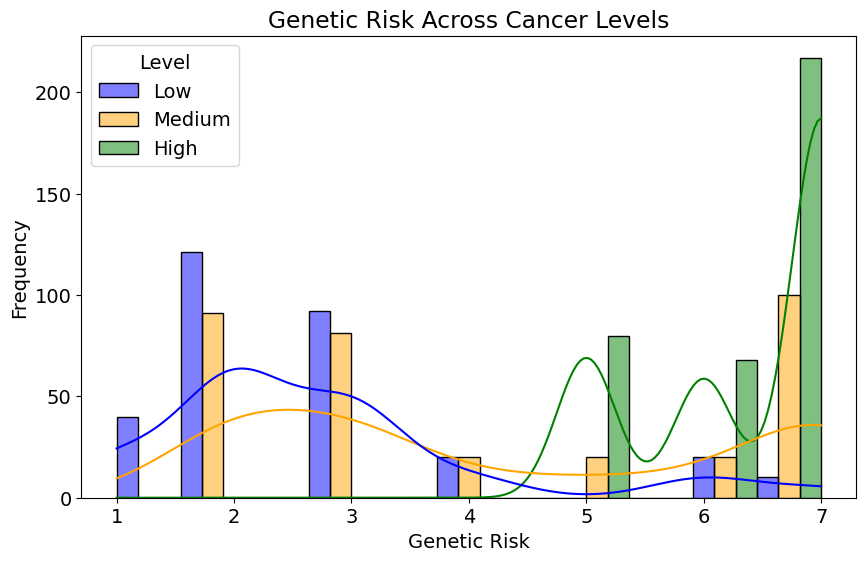

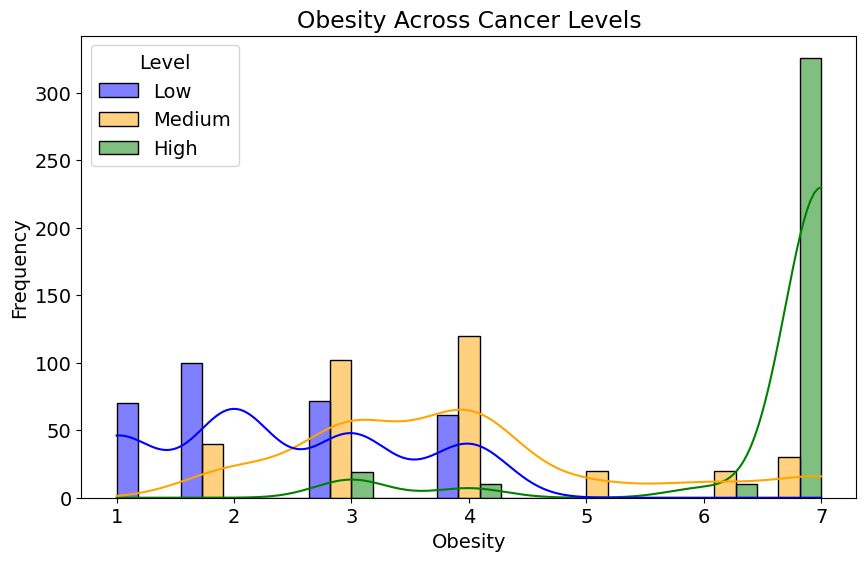

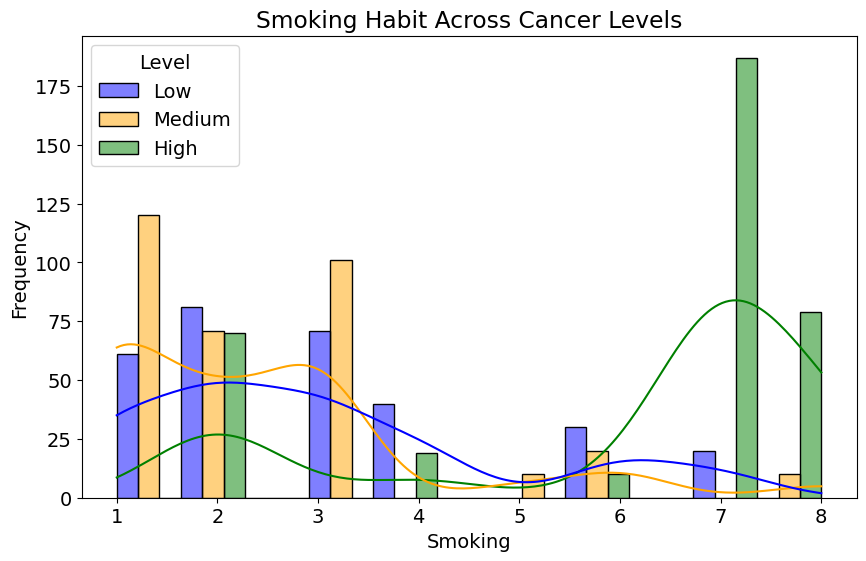

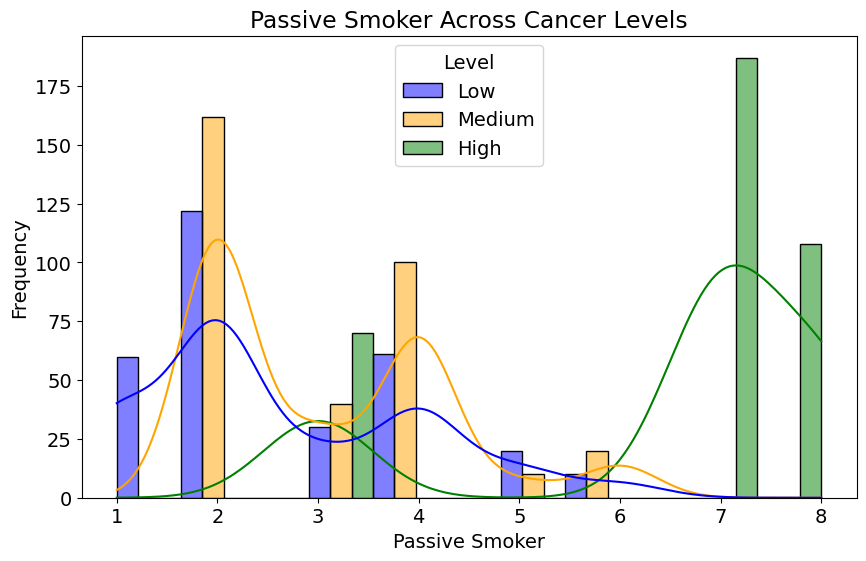

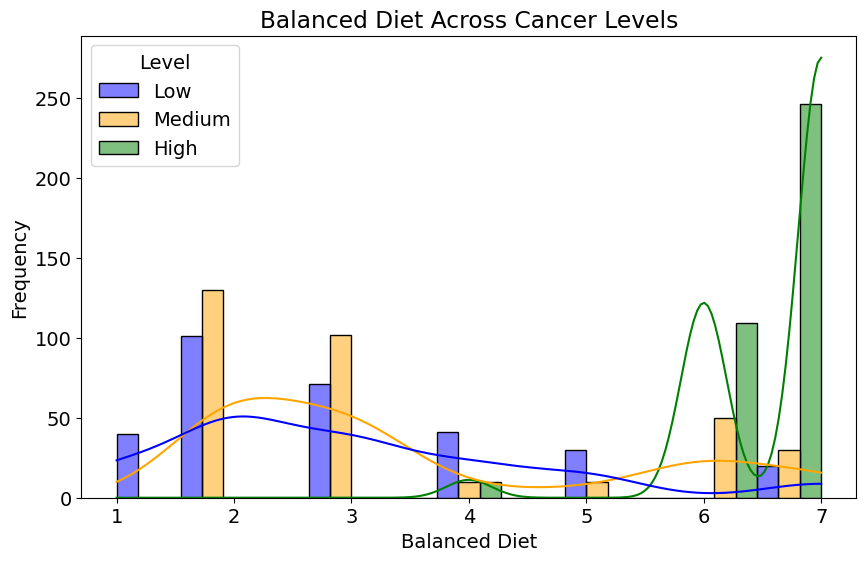

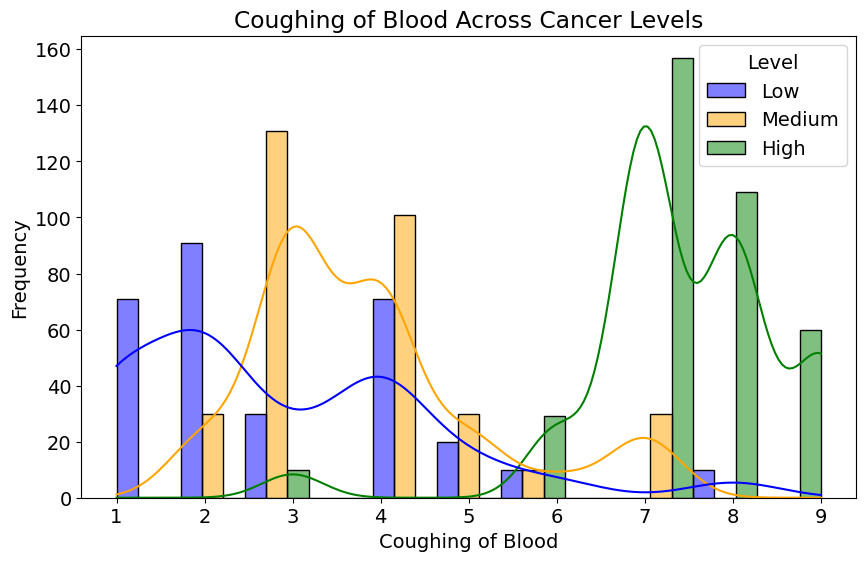

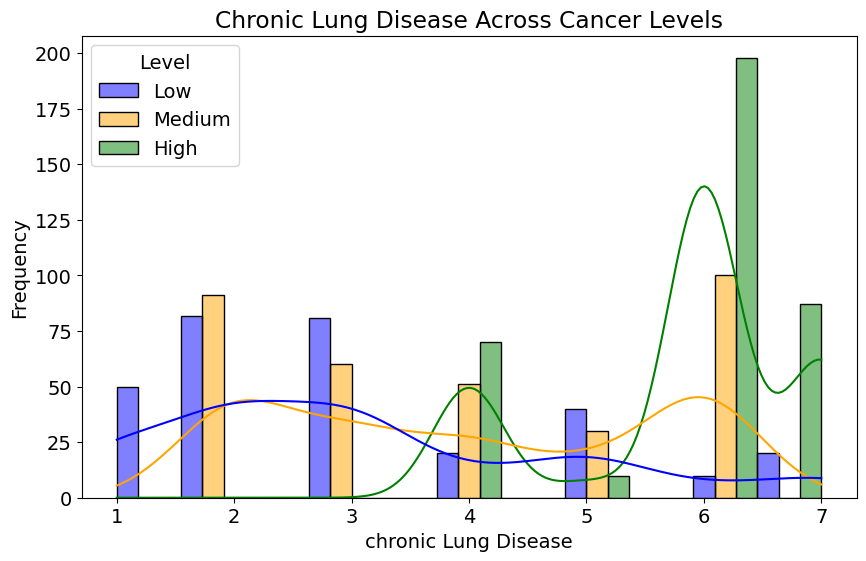

In [ ]:


# Redefine colors for better clarity
colors = ['blue', 'orange', 'green']

# Function to create histplot with bars closer together
def create_histplot(feature, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='Level', kde=True, palette=colors, multiple='dodge')
    plt.title(title)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# 2. Gender Distribution Across Cancer Levels with bars closer together
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gender', hue='Level', palette=colors, dodge=True)
plt.title('Gender Distribution of Patients Across Cancer Levels')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# 3. Other feature distributions across Cancer Levels with bars closer together
features = [
    ('Genetic Risk', 'Genetic Risk Across Cancer Levels'),
    ('Obesity', 'Obesity Across Cancer Levels'),
    ('Smoking', 'Smoking Habit Across Cancer Levels'),
    ('Passive Smoker', 'Passive Smoker Across Cancer Levels'),
    ('Balanced Diet', 'Balanced Diet Across Cancer Levels'),
    ('Coughing of Blood', 'Coughing of Blood Across Cancer Levels'),
    ('chronic Lung Disease', 'Chronic Lung Disease Across Cancer Levels')
]

for feature, title in features:
    create_histplot(feature, title)


Phân bố giới tính theo các mức độ ung thư:

Biểu đồ cho thấy sự phân bố số lượng bệnh nhân nam và nữ theo các mức độ ung thư (Thấp, Trung bình, Cao). Nhìn chung, số lượng bệnh nhân nam nhiều hơn so với bệnh nhân nữ ở tất cả các mức độ ung thư.
Phân bố nguy cơ di truyền theo các mức độ ung thư:

Biểu đồ phân bố nguy cơ di truyền cho thấy mức độ ung thư càng cao thì số lượng bệnh nhân có nguy cơ di truyền cao hơn. Các bệnh nhân ở mức độ ung thư cao thường có nguy cơ di truyền cao nhất.
Phân bố béo phì theo các mức độ ung thư:

Biểu đồ phân bố béo phì chỉ ra rằng số lượng bệnh nhân có tình trạng béo phì tập trung nhiều ở mức độ ung thư cao.

Biểu đồ thói quen hút thuốc lá cho thấy số lượng bệnh nhân hút thuốc lá tăng lên đáng kể ở các mức độ ung thư cao hơn. Điều này có thể chỉ ra mối liên hệ giữa thói quen hút thuốc lá và nguy cơ ung thư.
Phơi nhiễm hút thuốc lá thụ động theo các mức độ ung thư:

Biểu đồ cho thấy sự phơi nhiễm hút thuốc lá thụ động của bệnh nhân tăng lên theo các mức độ ung thư, đặc biệt ở mức độ ung thư cao.
Chế độ ăn cân đối theo các mức độ ung thư:

Biểu đồ cho thấy bệnh nhân có chế độ ăn cân đối thường có xu hướng tập trung ở mức độ ung thư thấp và trung bình. Ở mức độ ung thư cao, số lượng bệnh nhân có chế độ ăn cân đối giảm.
Ho ra máu theo các mức độ ung thư:

Biểu đồ ho ra máu chỉ ra rằng tình trạng ho ra máu phổ biến hơn ở các bệnh nhân ung thư mức độ cao. Điều này cho thấy triệu chứng ho ra máu có thể là dấu hiệu của ung thư nặng hơn.
Bệnh phổi mãn tính theo các mức độ ung thư:

Biểu đồ bệnh phổi mãn tính cho thấy rằng bệnh nhân có tình trạng bệnh phổi mãn tính cao hơn thường tập trung ở mức độ ung thư cao. Điều này cho thấy mối liên hệ giữa bệnh phổi mãn tính và nguy cơ ung thư cao hơn.

In [ ]:

# Function to calculate the percentage of patients in a specific range for a feature
def calculate_percentage(data, feature, high_risk_data):
    total_patients = len(data)
    high_risk_patients = len(high_risk_data)
    percentage = (high_risk_patients / total_patients) * 100
    return percentage

# Selected features for analysis
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
                     'chronic Lung Disease', 'Smoking', 'Balanced Diet', 'Obesity',
                     'Chest Pain', 'Coughing of Blood']

# Calculating percentages
percentages = {}
for feature in selected_features:
    high_risk_data_filtered = high_risk_data[high_risk_data[feature] >= 5]
    percentages[feature] = calculate_percentage(data, feature, high_risk_data_filtered)

# Creating a dataframe for better visualization
percentages_df = pd.DataFrame(list(percentages.items()), columns=['Feature', 'High Risk Percentage'])
percentages_df = percentages_df.sort_values(by='High Risk Percentage', ascending=False)

import ace_tools as tools; tools.display_dataframe_to_user(name="High Risk Percentages by Feature", dataframe=percentages_df)

percentages_df

In [ ]:
# Function to calculate the percentage of patients in a specific range for a feature
def calculate_percentage(data, feature, high_risk_data):
    total_patients = len(data)
    high_risk_patients = len(high_risk_data)
    percentage = (high_risk_patients / total_patients) * 100
    return percentage

# Selected features for analysis
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
                     'chronic Lung Disease', 'Smoking', 'Balanced Diet', 'Obesity',
                     'Chest Pain', 'Coughing of Blood']

# Calculating percentages
percentages = {}
for feature in selected_features:
    # Replace high_risk_data with data
    high_risk_data_filtered = data[data[feature] >= 5]
    percentages[feature] = calculate_percentage(data, feature, high_risk_data_filtered)

# Creating a dataframe for better visualization
percentages_df = pd.DataFrame(list(percentages.items()), columns=['Feature', 'High Risk Percentage'])
percentages_df = percentages_df.sort_values(by='High Risk Percentage', ascending=False)


percentages_df

In [ ]:


# Function to calculate the percentage of patients in each risk category for a feature
def calculate_percentage_by_category(data, feature):
    low_risk_percentage = ((data[feature] < 3).sum() / len(data)) * 100
    medium_risk_percentage = (((data[feature] >= 3) & (data[feature] < 7)).sum() / len(data)) * 100
    high_risk_percentage = ((data[feature] >= 7).sum() / len(data)) * 100
    return low_risk_percentage, medium_risk_percentage, high_risk_percentage

# Selected features for analysis
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
                     'chronic Lung Disease', 'Smoking', 'Balanced Diet', 'Obesity',
                     'Chest Pain', 'Coughing of Blood']

# Creating an empty DataFrame to store the results
risk_percentage_df = pd.DataFrame(columns=['Feature', 'Low Risk Percentage', 'Medium Risk Percentage', 'High Risk Percentage'])

# Calculating percentages for each risk category for each feature
for feature in selected_features:
    low_risk_percentage, medium_risk_percentage, high_risk_percentage = calculate_percentage_by_category(data, feature)
    risk_percentage_df.loc[len(risk_percentage_df)] = [feature, low_risk_percentage, medium_risk_percentage, high_risk_percentage]

# Sorting the DataFrame by high risk percentage
risk_percentage_df = risk_percentage_df.sort_values(by='High Risk Percentage', ascending=False)
risk_percentage_df



In [ ]:


# Splitting the data into male and female
data_male = data[data['Gender'] == 1]
data_female = data[data['Gender'] == 0]

# Function to calculate the percentage of patients in each risk category for a feature
def calculate_percentage_by_category(data, feature):
    low_risk_percentage = ((data[feature] < 3).sum() / len(data)) * 100
    medium_risk_percentage = (((data[feature] >= 3) & (data[feature] < 7)).sum() / len(data)) * 100
    high_risk_percentage = ((data[feature] >= 7).sum() / len(data)) * 100
    return low_risk_percentage, medium_risk_percentage, high_risk_percentage

# Selected features for analysis
selected_features = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk',
                     'chronic Lung Disease', 'Smoking', 'Balanced Diet', 'Obesity',
                     'Chest Pain', 'Coughing of Blood']

# Creating empty DataFrames to store the results for male and female
risk_percentage_male_df = pd.DataFrame(columns=['Feature', 'Low Risk Percentage', 'Medium Risk Percentage', 'High Risk Percentage'])
risk_percentage_female_df = pd.DataFrame(columns=['Feature', 'Low Risk Percentage', 'Medium Risk Percentage', 'High Risk Percentage'])

# Calculating percentages for each risk category for each feature for male
for feature in selected_features:
    low_risk_percentage, medium_risk_percentage, high_risk_percentage = calculate_percentage_by_category(data_male, feature)
    risk_percentage_male_df.loc[len(risk_percentage_male_df)] = [feature, low_risk_percentage, medium_risk_percentage, high_risk_percentage]

# Calculating percentages for each risk category for each feature for female
for feature in selected_features:
    low_risk_percentage, medium_risk_percentage, high_risk_percentage = calculate_percentage_by_category(data_female, feature)
    risk_percentage_female_df.loc[len(risk_percentage_female_df)] = [feature, low_risk_percentage, medium_risk_percentage, high_risk_percentage]

# Sorting the DataFrames by high risk percentage
risk_percentage_male_df = risk_percentage_male_df.sort_values(by='High Risk Percentage', ascending=False)
risk_percentage_female_df = risk_percentage_female_df.sort_values(by='High Risk Percentage', ascending=False)

risk_percentage_male_df, risk_percentage_female_df


In [ ]:
import matplotlib.pyplot as plt


# Plot pie charts for each feature
plt.figure(figsize=(15, 20))
num_features = len(risk_percentage_df)
for i, row in risk_percentage_df.iterrows():
    plt.subplot((num_features // 2) + (num_features % 2), 2, i + 1)
    percentages = row[['Low Risk Percentage', 'Medium Risk Percentage', 'High Risk Percentage']].values
    labels = ['Low Risk', 'Medium Risk', 'High Risk']
    plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'{row["Feature"]} - Risk Categories')
    plt.axis('equal')

plt.tight_layout()
plt.show()


In [ ]:
# @title Risk Percentages by Feature

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'risk_percentage_df'
plt.figure(figsize=(12, 6))
plt.bar(risk_percentage_df['Feature'], risk_percentage_df['Low Risk Percentage'], label='Low Risk')
plt.bar(risk_percentage_df['Feature'], risk_percentage_df['Medium Risk Percentage'], bottom=risk_percentage_df['Low Risk Percentage'], label='Medium Risk')
plt.bar(risk_percentage_df['Feature'], risk_percentage_df['High Risk Percentage'], bottom=risk_percentage_df['Low Risk Percentage'] + risk_percentage_df['Medium Risk Percentage'], label='High Risk')
plt.xlabel('Feature')
plt.ylabel('Risk Percentage')
plt.title('Risk Percentages by Feature')
plt.xticks(rotation=45, ha='right')
_ = plt.legend()


# Model building

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns


# Separate features and target variable
# Tách các tính năng và biến mục tiêu
X = data.drop(['Level'], axis=1)
y = data['Level']

# SelectKBest to select features
# Chọn các tính năng với SelectKBest
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X, y)

# Create DataFrame for visualization
# Tạo DataFrame để trực quan hóa
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# Plotting feature scores
# Vẽ biểu đồ điểm số các biến
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis', linewidth=0.5, saturation=2, orient='h', ax=ax)
plt.title('Features correlations')
plt.xlabel('Score')
plt.ylabel('Features')
plt.savefig('Feature_Importance.png')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Chọn các tính năng với điểm số >= 200
selected_features = featureScores[featureScores['Score'] >= 200]['Feature'].tolist()
selected_features.append('Level')  # Thêm biến mục tiêu
new_data = data[selected_features]

# Tách các tính năng và biến mục tiêu
X = new_data.drop(['Level'], axis=1)
y = new_data['Level']

# Mã hóa biến mục tiêu
le = LabelEncoder()
y = le.fit_transform(y)

# Chuẩn hóa các tính năng
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Khởi tạo các mô hình
log_reg = LogisticRegression(random_state=42, max_iter=200, C=0.1)
dec_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
rand_forest = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5)
knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier(random_state=42, max_iter=300, alpha=0.1)

# Đánh giá mô hình bằng cách chéo
log_reg_scores = cross_val_score(log_reg, X, y, cv=5)
dec_tree_scores = cross_val_score(dec_tree, X, y, cv=5)
rand_forest_scores = cross_val_score(rand_forest, X, y, cv=5)
knn_scores = cross_val_score(knn, X, y, cv=5)
mlp_scores = cross_val_score(mlp, X, y, cv=5)

# Huấn luyện các mô hình
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)
mlp.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report

# Dự đoán trên tập kiểm tra
log_reg_pred = log_reg.predict(X_test)
dec_tree_pred = dec_tree.predict(X_test)
rand_forest_pred = rand_forest.predict(X_test)
knn_pred = knn.predict(X_test)
mlp_pred = mlp.predict(X_test)

# Báo cáo phân loại
log_reg_report = classification_report(y_test, log_reg_pred, target_names=le.classes_)
dec_tree_report = classification_report(y_test, dec_tree_pred, target_names=le.classes_)
rand_forest_report = classification_report(y_test, rand_forest_pred, target_names=le.classes_)
knn_report = classification_report(y_test, knn_pred, target_names=le.classes_)
mlp_report = classification_report(y_test, mlp_pred, target_names=le.classes_)

# Hiển thị điểm đánh giá chéo

cross_val_results = {
    "Logistic Regression": log_reg_scores,
    "Decision Tree": dec_tree_scores,
    "Random Forest": rand_forest_scores,
    "KNN": knn_scores,
    "MLP Classifier": mlp_scores
}

cross_val_df = pd.DataFrame(cross_val_results)

print("Cross Validation Scores:\n", cross_val_df)
print("\nLogistic Regression Report:\n", log_reg_report)
print("\nDecision Tree Report:\n", dec_tree_report)
print("\nRandom Forest Report:\n", rand_forest_report)
print("\nKNN Report:\n", knn_report)
print("\nMLP Classifier Report:\n", mlp_report)


Dữ liệu đã được xử lý, chọn lựa tính năng, huấn luyện mô hình và đánh giá thành công. Dưới đây là các kết quả chính:

**Điểm Đánh Giá Chéo**
Điểm đánh giá chéo cho mỗi mô hình được hiển thị trong bảng. Hầu hết các mô hình đạt điểm cao, cho thấy hiệu suất tốt trong quá trình đánh giá chéo.

Báo Cáo Phân Loại Logistic Regression  
Báo Cáo Hồi Quy Tuyến Tính: **bold text**

Độ chính xác tổng thể: 89%
Precision, recall và f1-score cho mỗi lớp đều tốt, đặc biệt là lớp "High".
B**áo Cáo Cây Quyết Định Decision Tree** :

Độ chính xác tổng thể: 99%
Precision, recall và f1-score rất cao cho tất cả các lớp.
Báo Cáo Random Forest  :

Độ chính xác hoàn hảo: 100%
Precision, recall và f1-score hoàn hảo cho tất cả các lớp.
Báo Cáo KNN:

Độ chính xác hoàn hảo: 100%
Precision, recall và f1-score hoàn hảo cho tất cả các lớp.
Báo Cáo Bộ Phân Loại MLP:

Độ chính xác hoàn hảo: 100%
Precision, recall và f1-score hoàn hảo cho tất cả các lớp.
Các mô hình Random Forest, KNN và MLP đều hoạt động xuất sắc với điểm số hoàn hảo, cho thấy khả năng overfitting tiềm ẩn. Mô hình Decision Tree cũng hoạt động rất tốt nhưng với điểm số hơi thấp hơn so với Random Forest, KNN và MLP.